# **1.  Data Cleaning and Transformation** 

#**Importing Diabetic Dataset**

In [104]:
import pandas as pd 

dataset = pd.read_csv("/content/diabetic_data.csv")

#**Shape of data set**

In [105]:
dataset.shape

(101766, 50)

In [106]:
dataset.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


#**Replacing all missing values '?' with numpy.nan**

In [107]:
# Using Impute from sklearn to replace '?'wit NaN

from sklearn.impute import SimpleImputer 
import numpy as np

imputer = SimpleImputer(missing_values='?',strategy="constant",fill_value=np.nan)
imputer.fit(dataset)
data = imputer.transform(dataset)
data_1 = pd.DataFrame(data)
data_1.columns = dataset.columns 
data_1.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


#**Dropping columns with more than 50% missing values**

In [121]:
# Removing all columns with 50% missing values

missing_per = data_1.isnull().mean()*100 
arr =[]
for i in data_1.columns: 
  if missing_per[i]>50:
    arr.append(i)

data_2 = data_1.drop(columns = arr)

#**Dropping colums with more than 90% duplicate values**

In [122]:
# Dropping columns with 90% of duplicate values

arr1=[]
for i in data_2.columns:
  duplicate_per =  100*data_2[i]. value_counts().max()/len(data_2[i])
  if duplicate_per > 95:
    arr1.append(i)

data_3 = data_2.drop(columns=arr1)

#**Transform Age column with mid values in given range**

In [123]:
# Taking mid value of given range in age column

arr3 =[]
for i in range(len(data_3.age)):
  u = data_3.age[i]
  k = u[1:-1].split("-")
  a = int(k[0])
  b = int(k[1])
  arr3.append((a+b)/2)

data_3.loc[:,'age'] = arr3
data_3.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,...,metformin,glimepiride,glipizide,glyburide,pioglitazone,rosiglitazone,insulin,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,5.0,6,25,1,1,NaN,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,15.0,1,1,7,3,NaN,...,No,No,No,No,No,No,Up,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,25.0,1,1,7,2,NaN,...,No,No,Steady,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,35.0,1,1,7,2,NaN,...,No,No,No,No,No,No,Up,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,45.0,1,1,7,1,NaN,...,No,No,Steady,No,No,No,Steady,Ch,Yes,NO


#**Fill missing values in diag_1, diag_2, diag_3  &  dropping rest columns with missing values**

In [ ]:
# Filling missing values in diag_1, diag_2, diag_3 column and droping columns with missing values

cols = ["diag_1","diag_2","diag_3"]
data_3[cols] = data_3[cols].fillna(0)
data_3.isnull().mean()*100

data_4 = data_3.dropna(axis=1)
data_4.shape

cols=['time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient','number_diagnoses']

for i in cols:
  data_4[i] = pd.to_numeric(data_4[i])

#**Identifying Numerical & Categorical Features**

In [125]:
# Categorical features
categorical_var = data_4.select_dtypes(include=["object","category","bool"]).columns

# Numerical features
numerical_var = data_4.select_dtypes(exclude=["object","category","bool"]).columns

In [126]:
data_4[numerical_var].head()

,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
0,5.0,1,41,0,1,0,0,0,1
1,15.0,3,59,0,18,0,0,0,9
2,25.0,2,11,5,13,2,0,1,6
3,35.0,2,44,1,16,0,0,0,7
4,45.0,1,51,0,8,0,0,0,5


#**Removing Outliers in Numerical Columns**

In [127]:
# Only taking those datapoints which is 3*standard deviation  away from there means ( for every numerical columns )

triple_std = np.array(3*data_4[numerical_var].std())

mean = np.array(data_4[numerical_var].std())

max_range = mean+triple_std

max_range

array([63.76335077, 11.94043107, 78.697449  ,  6.82322792, 32.51026484,
        5.06906039,  3.72188907,  5.05145316,  7.73440058])

In [129]:


df1 = data_4[data_4['age']<63.76]
df2 = df1[df1['time_in_hospital']<11.94]
df3 = df2[df2['num_lab_procedures']<78.69]
df4 = df3[df3['num_procedures']<6.82]
df5 = df4[df4['num_medications']<32.51]
df6 = df5[df5['number_outpatient']<5.06]
df7 = df6[df6['number_emergency']<3.72]
df8 = df7[df7['number_inpatient']< 5.05]
df9 = df8[df8['number_diagnoses']<7.73] 

# New dataset after removing outliers
df9.head()

,encounter_id,patient_nbr,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,...,metformin,glimepiride,glipizide,glyburide,pioglitazone,rosiglitazone,insulin,change,diabetesMed,readmitted
0,2278392,8222157,Female,5.0,6,25,1,1,41,0,...,No,No,No,No,No,No,No,No,No,NO
2,64410,86047875,Female,25.0,1,1,7,2,11,5,...,No,No,Steady,No,No,No,No,No,Yes,NO
3,500364,82442376,Male,35.0,1,1,7,2,44,1,...,No,No,No,No,No,No,Up,Ch,Yes,NO
4,16680,42519267,Male,45.0,1,1,7,1,51,0,...,No,No,Steady,No,No,No,Steady,Ch,Yes,NO
17,84222,108662661,Female,55.0,1,1,7,3,29,0,...,No,No,No,Steady,No,No,No,No,Yes,NO


#**Removing duplicate values in  'patient_nbr'  column  & showing shape of resulting Dataframe**

In [131]:
# Removing duplicates in 'patient_nbr' columns
final_dataset = df9.drop_duplicates(subset=['patient_nbr'])

# Shape of Final dataset
final_dataset.shape

(13457, 30)

In [132]:
# Top 5 datapoints in final dataset
final_dataset.head()

,encounter_id,patient_nbr,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,...,metformin,glimepiride,glipizide,glyburide,pioglitazone,rosiglitazone,insulin,change,diabetesMed,readmitted
0,2278392,8222157,Female,5.0,6,25,1,1,41,0,...,No,No,No,No,No,No,No,No,No,NO
2,64410,86047875,Female,25.0,1,1,7,2,11,5,...,No,No,Steady,No,No,No,No,No,Yes,NO
3,500364,82442376,Male,35.0,1,1,7,2,44,1,...,No,No,No,No,No,No,Up,Ch,Yes,NO
4,16680,42519267,Male,45.0,1,1,7,1,51,0,...,No,No,Steady,No,No,No,Steady,Ch,Yes,NO
17,84222,108662661,Female,55.0,1,1,7,3,29,0,...,No,No,No,Steady,No,No,No,No,Yes,NO


#2. *Data Exploration*

In [133]:
import matplotlib.pyplot as plt
import numpy as np

Bottom = [5.0, 15.0, 25.0, 35.0, 45.0, 55.0]

# Splitting Data frame on basis of three classes in readmission column '<30', '>30', 'NO'
case1 = final_dataset[final_dataset["readmitted"]=='<30']
case2 = final_dataset[final_dataset["readmitted"]=='>30']
case3 = final_dataset[final_dataset["readmitted"]=='NO']

u1 = np.array(case1["age"],dtype=object)
u2 = np.array(case2["age"],dtype=object)
u3 = np.array(case3["age"],dtype=object)

#**Age  vs  Readmission**

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


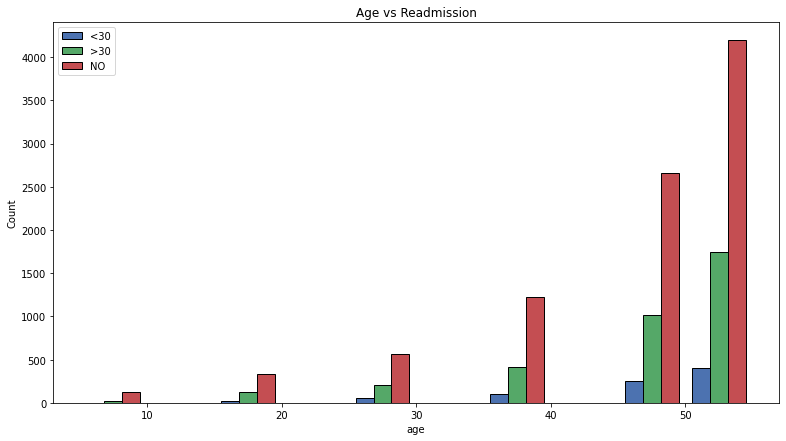

In [134]:
# Age impact on Readmission

plt.style.use('seaborn-deep')
fig, ax = plt.subplots(figsize=(13,7))


ax.set_title("Age vs Readmission")
ax.set_xlabel("age")
ax.set_ylabel("Count")
ax.hist([u1,u2,u3],label=['<30','>30','NO'],ec="black")
ax.legend(loc='upper left')
plt.show()

#**African_Americans  vs  Other Ethnic groups**

In [137]:
# impact of African_American vs Other Ethinc groups on Readmision
 
df  = data_3[['race', 'readmitted']].dropna()

race1 = df[df['readmitted']=='<30']
race2 = df[df['readmitted']=='>30']
race3 = df[df['readmitted']=='NO']

k1 = np.array(race1['race'].value_counts())
k2 = np.array(race2['race'].value_counts())
k3 = np.array(race3['race'].value_counts()) 
xvals = [[k1[1],sum(k1)-k1[1]],[k2[1],sum(k2)-k2[1]],[k3[1],sum(k3)-k3[1]]]
indcs = ["African American","Other Ethinc Group"]


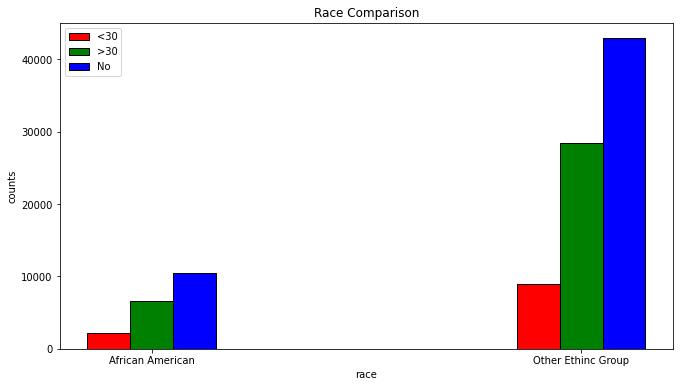

In [138]:
N = 2
ind = np.arange(N)
width = 0.1
fig, ax = plt.subplots(figsize=(11,6))

bar1 = ax.bar(ind, xvals[0], width, color = 'r',ec="black")
bar2 = ax.bar(ind+width, xvals[1], width, color='g',ec="black") 
bar3 = ax.bar(ind+width*2, xvals[2], width, color = 'b',ec="black")
  
ax.set_xlabel("race")
ax.set_ylabel('counts')
ax.set_title("Race Comparison")
  
plt.xticks(ind+width,indcs)
ax.legend( (bar1, bar2, bar3), ('<30', '>30', 'No') )
plt.show()

#**Women  vs  Men**

In [141]:
# Who is more likely to get admitted men or women ?
# Lets see 
gender1 = np.array(case1["gender"].value_counts())
gender2 = np.array(case2["gender"].value_counts())
gender3 = np.array(case3["gender"].value_counts()) 

Xvals = [[gender1[0]+gender2[0],gender1[1]+gender2[1]],[gender3[1],gender3[0]]]
Indcs = ["Female","Male"]

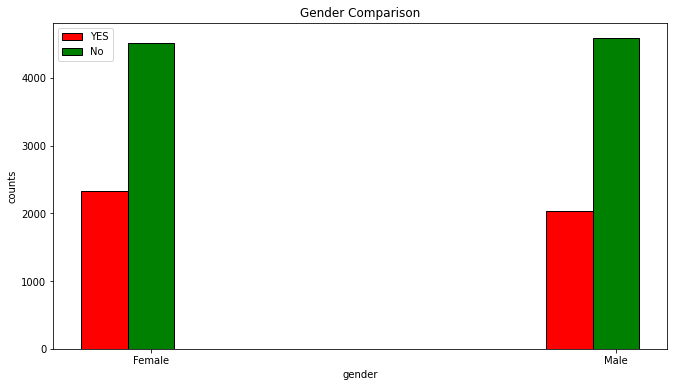

In [142]:
N = 2
ind = np.arange(N)
width = 0.1
fig, ax = plt.subplots(figsize=(11,6))

bar3 = ax.bar(ind, Xvals[0], width, color = 'r',ec="black")
bar4 = ax.bar(ind+width, Xvals[1], width, color='g',ec="black") 
  
ax.set_xlabel("gender")
ax.set_ylabel('counts')
ax.set_title("Gender Comparison")
  
plt.xticks(ind+width,Indcs)
ax.legend( (bar3, bar4), ('YES', 'No') )
plt.show()

#**Diag  vs Readmission**

In [143]:
# impact of diag_type on readmission
X_vals = []
keys = []
for i in set(case3['diag_1']):
  keys.append(i)
  X_vals.append(case3['diag_1'].value_counts()[i])

fig = plt.figure(figsize = (400, 150))
 
# creating the bar plot
plt.bar(keys,X_vals, color ='blue',
        width = 0.4)
 
plt.xlabel("Diag_1")
plt.ylabel("No Readmission")
plt.title("Diag_1 vs Readmission")
plt.show()

#3. *Model Building* 

#**Dataset for model building by taking subset**

In [ ]:
DATA = final_dataset[['num_medications', 'number_outpatient', 'number_emergency', 'time_in_hospital',
'number_inpatient', 'encounter_id', 'age', 'num_lab_procedures', 'number_diagnoses',
'num_procedures', 'readmitted']]

DATA['encounter_id'] = pd.to_numeric(DATA['encounter_id'])

#**Some Extra Data Preprecessing work**

In [ ]:
from sklearn.preprocessing import MinMaxScaler 

# Normalizing the high values of 'encounter_id' column

scaler = MinMaxScaler(feature_range=(1,2))
scaler.fit(DATA[['encounter_id']])
DATA['encounter_id'] = scaler.transform(DATA[['encounter_id']])

DATA['readmitted'].mask(DATA['readmitted'] == 'NO', int(0), inplace=True)
DATA['readmitted'].mask(DATA['readmitted'] == '>30', int(1), inplace=True)
DATA['readmitted'].mask(DATA['readmitted'] == '<30', int(1), inplace=True)

In [149]:
# Finl dataset for model building
DATA.head()

,num_medications,number_outpatient,number_emergency,time_in_hospital,number_inpatient,encounter_id,age,num_lab_procedures,number_diagnoses,num_procedures,readmitted
0,1,0,0,1,0,1.005096,5.0,41,1,0,0
2,13,2,0,2,1,1.000108,25.0,11,6,5,0
3,16,0,0,2,0,1.001090,35.0,44,7,1,0
4,8,0,0,1,0,1.000000,45.0,51,5,0,0
17,11,0,0,3,0,1.000152,55.0,29,3,0,0


#**Splitting Data in Training and Testing part**

In [152]:
from sklearn.model_selection import train_test_split 

# Separating target class and input features
X = DATA.drop(columns=['readmitted'])
y = DATA['readmitted']
y=y.astype('int')

# Split final data in Train & test part
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

#**K-fold cross validation using Decision tree and K nearest neighbour classifier models**

In [153]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

models =[]
models.append(('DT',DecisionTreeClassifier()))
models.append(('KNN',KNeighborsClassifier()))
print(models)

[('DT', DecisionTreeClassifier()), ('KNN', KNeighborsClassifier())]


In [154]:
names =[]
from sklearn.model_selection import cross_val_score,StratifiedKFold,KFold
results = dict()

for name, model in models:
  kfold = KFold(n_splits=20)
  cv_results = cross_val_score(model,X_train,y_train,cv=kfold,scoring='accuracy')
  results[name]=(cv_results.mean(),cv_results.std())
  names.append(name)

In [155]:
#                         accuracy percentage
#   Decision tree ->            60%
#   K-nearest neighbour ->      62%

print("name  results.mean  results.std")
for key, value in results.items():
  print(key,value)

name  results.mean  results.std
DT (0.6072495879054561, 0.018527525291318656)
KNN (0.6298266788973109, 0.025307598668740355)


#**Plotting Confusion matrix**

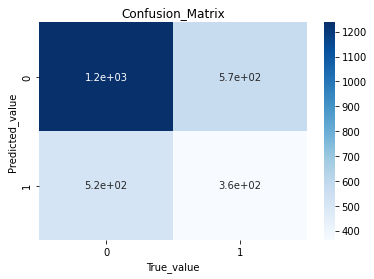

In [156]:
model = DecisionTreeClassifier()
model.fit(X_train,y_train)
prediction = model.predict(X_test)

from sklearn.metrics import confusion_matrix 
import seaborn as sns

cf_matrix = confusion_matrix(y_test,prediction)
ax = sns.heatmap(cf_matrix,annot=True,cmap='Blues')

ax.set_title('Confusion_Matrix')
ax.set_xlabel('True_value')
ax.set_ylabel('Predicted_value')
ax.xaxis.set_ticklabels(model.classes_)
ax.yaxis.set_ticklabels(model.classes_)
plt.show()

# **2.** ***Improved Model***

#**1.** **Improved accuracy with logistic model over diabetic dataset**

In [ ]:
# Using Logistic regression for more better acccruracy
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score

Model = LogisticRegression()
Model.fit(X_train,y_train)

Predictions = Model.predict(X_test)

In [159]:
# Logistic regression -> 69.5% accuracy ( improved accuracy with new model)
accuracy_score(y_test,Predictions)

0.6950222882615156

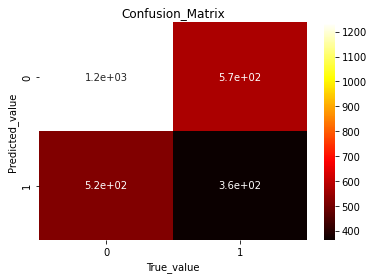

In [161]:
# Plotting Confusio matrix for improved model
Cf_matrix = confusion_matrix(y_test,prediction)
axe = sns.heatmap(Cf_matrix,annot=True,cmap='hot')

axe.set_title('Confusion_Matrix')
axe.set_xlabel('True_value')
axe.set_ylabel('Predicted_value')
axe.xaxis.set_ticklabels(Model.classes_)
axe.yaxis.set_ticklabels(Model.classes_)
plt.show()

#**2.  K-Mean clustering to form clusters and visualise it**

In [162]:
DATA.columns

Index(['num_medications', 'number_outpatient', 'number_emergency',
       'time_in_hospital', 'number_inpatient', 'encounter_id', 'age',
       'num_lab_procedures', 'number_diagnoses', 'num_procedures',
       'readmitted'],
      dtype='object')

In [163]:
DATA_Cluster = DATA.drop(columns=['readmitted'])

In [164]:
DATA_Cluster.head()

,num_medications,number_outpatient,number_emergency,time_in_hospital,number_inpatient,encounter_id,age,num_lab_procedures,number_diagnoses,num_procedures
0,1,0,0,1,0,1.005096,5.0,41,1,0
2,13,2,0,2,1,1.000108,25.0,11,6,5
3,16,0,0,2,0,1.001090,35.0,44,7,1
4,8,0,0,1,0,1.000000,45.0,51,5,0
17,11,0,0,3,0,1.000152,55.0,29,3,0


#**Taking  K=20 and plotting clusters for each pair of features**

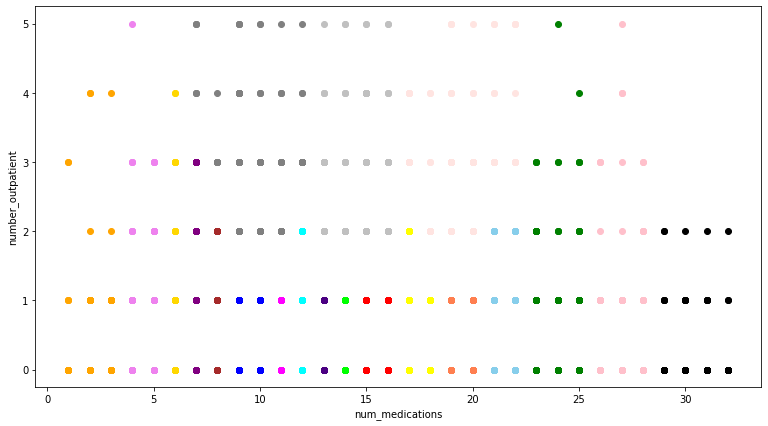

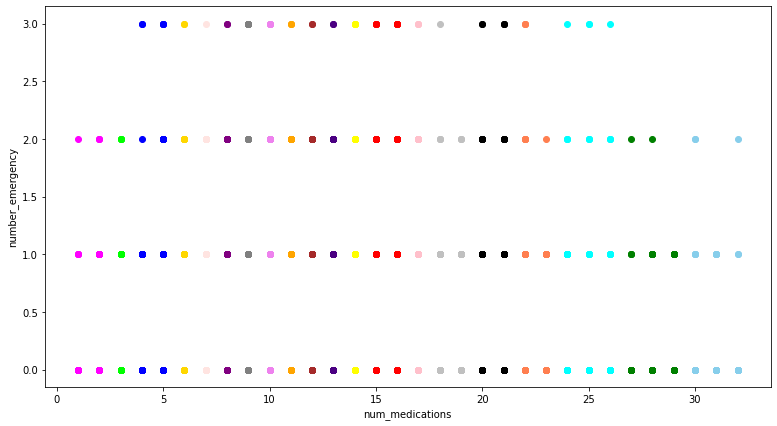

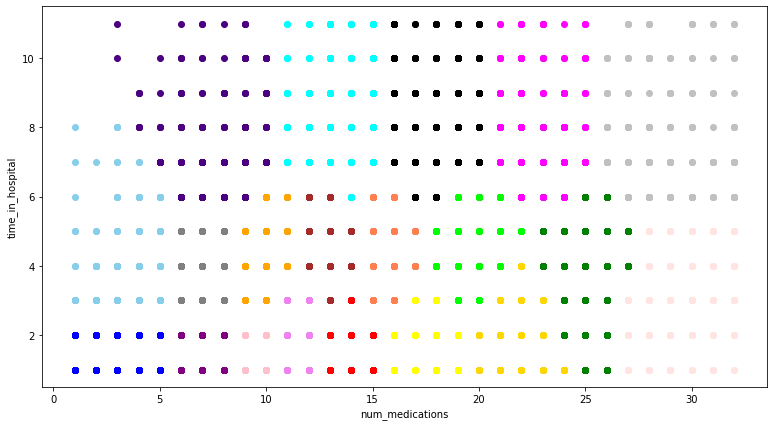

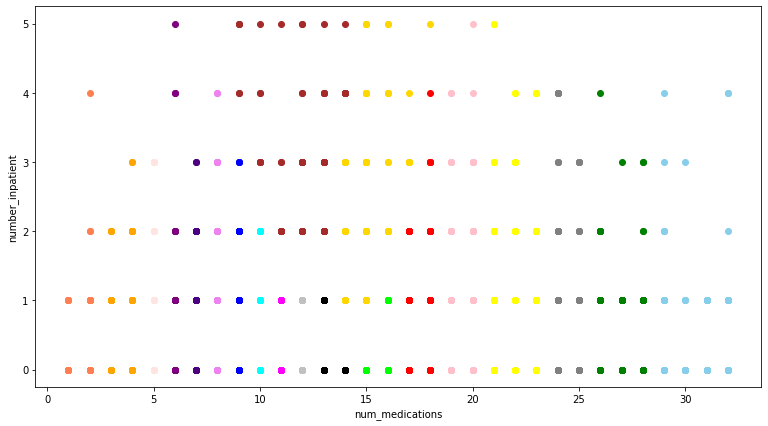

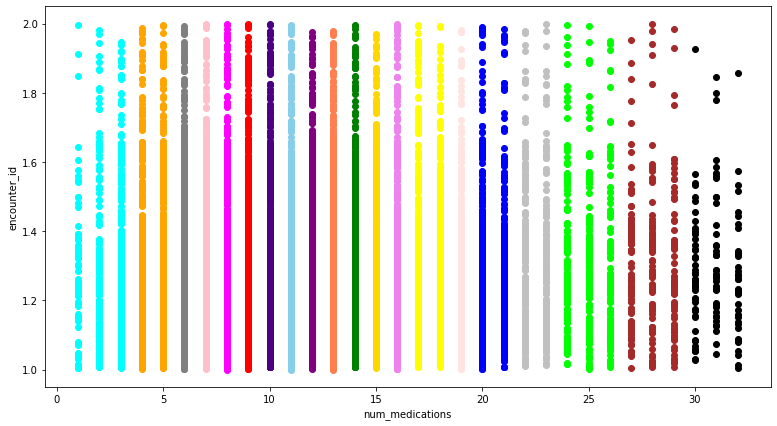

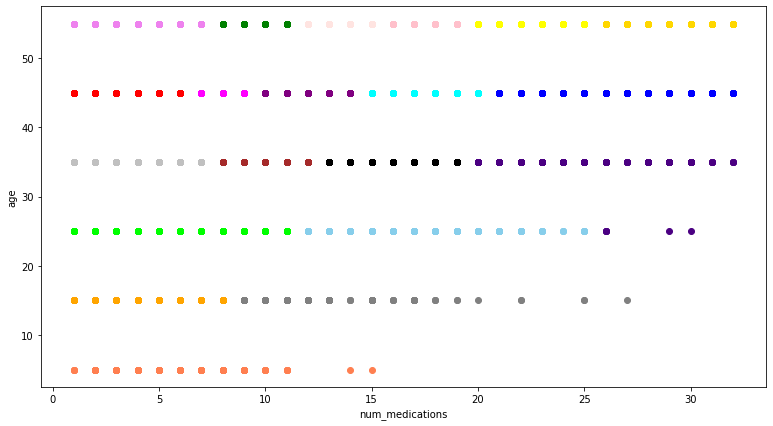

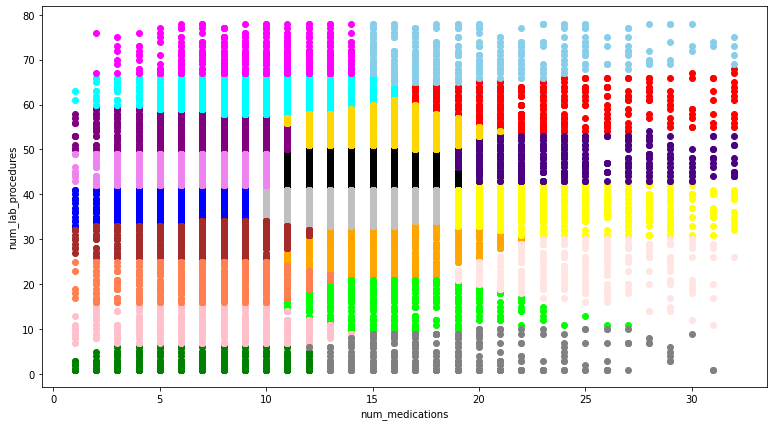

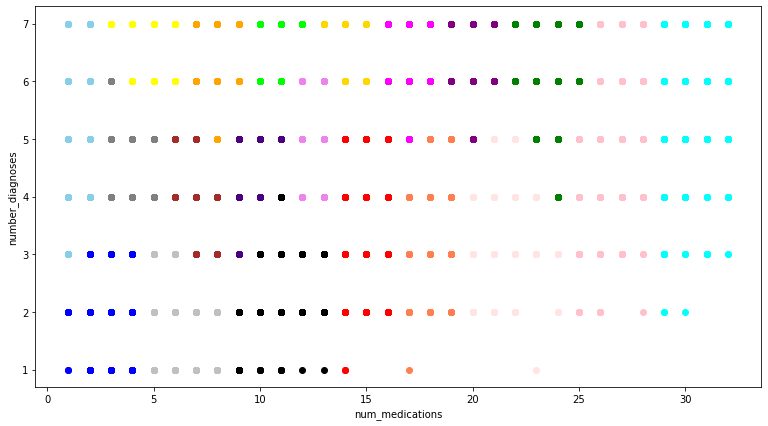

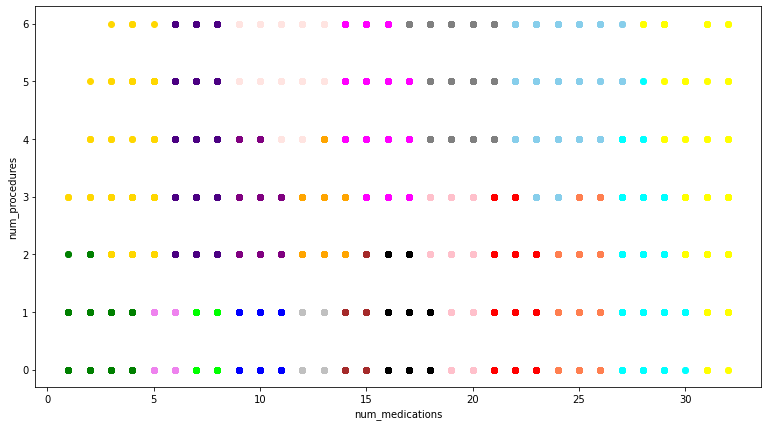

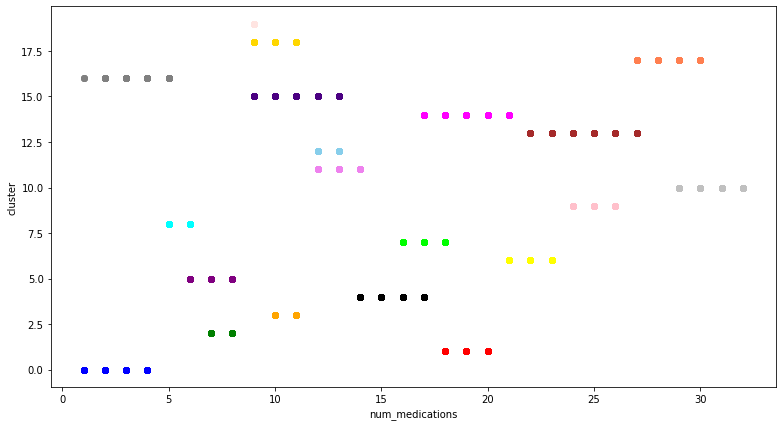

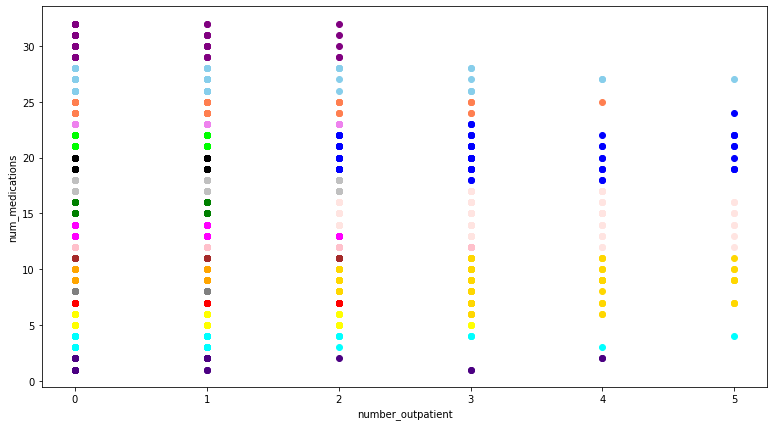

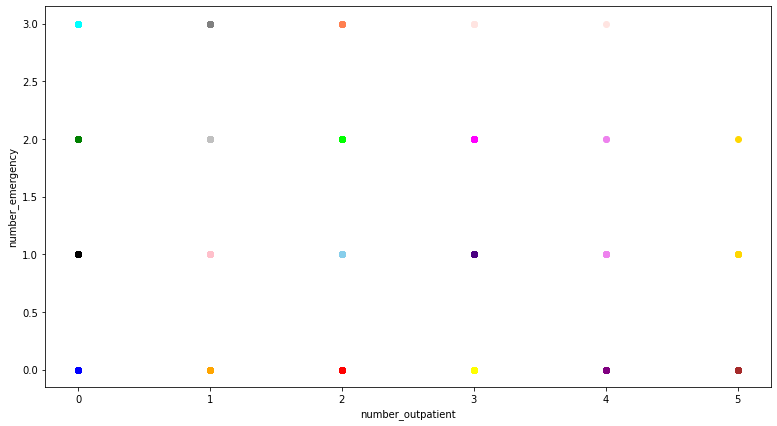

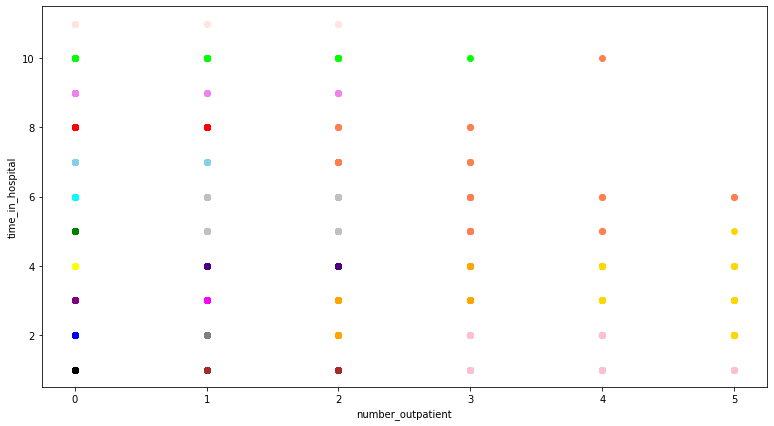

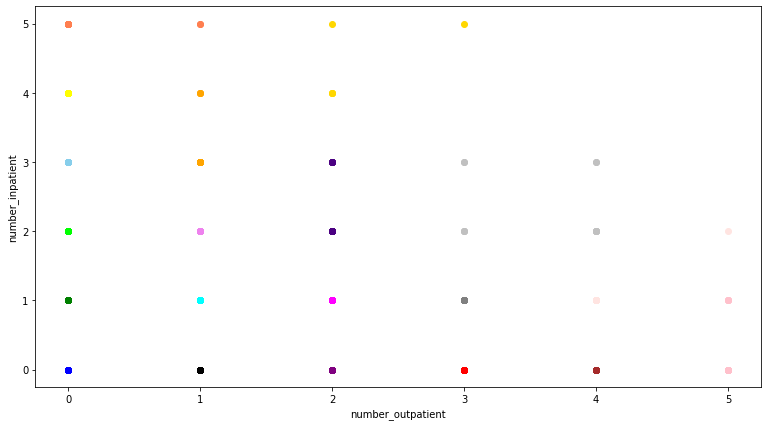

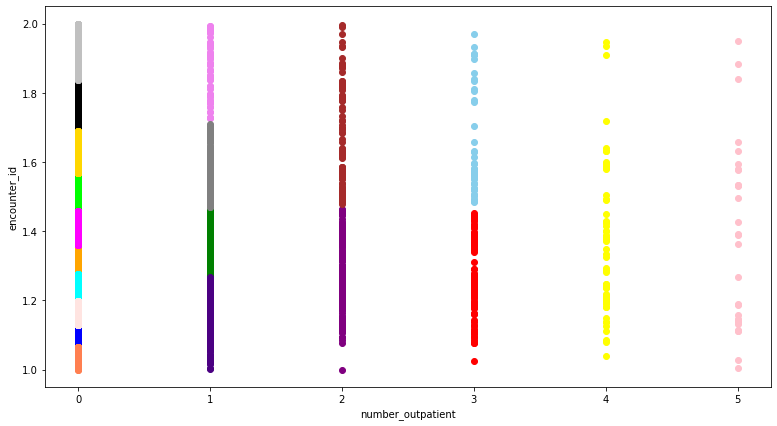

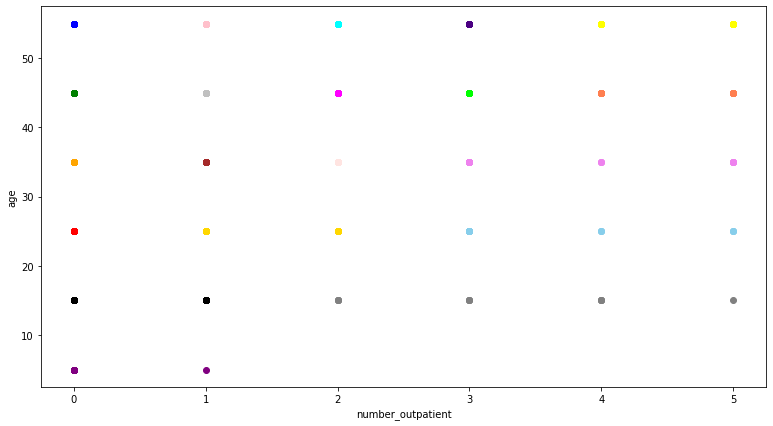

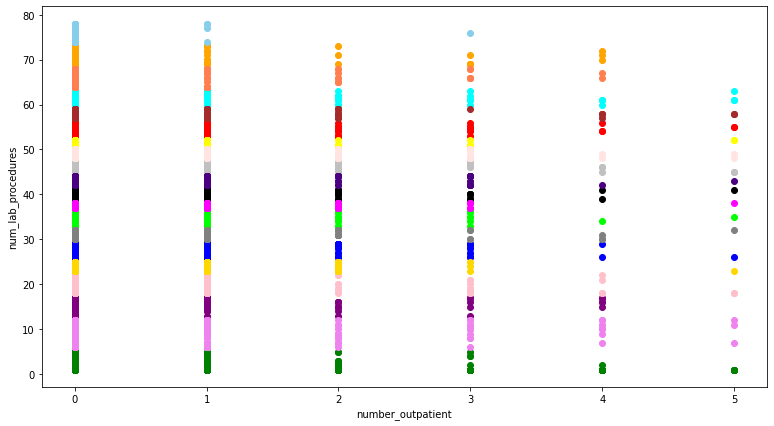

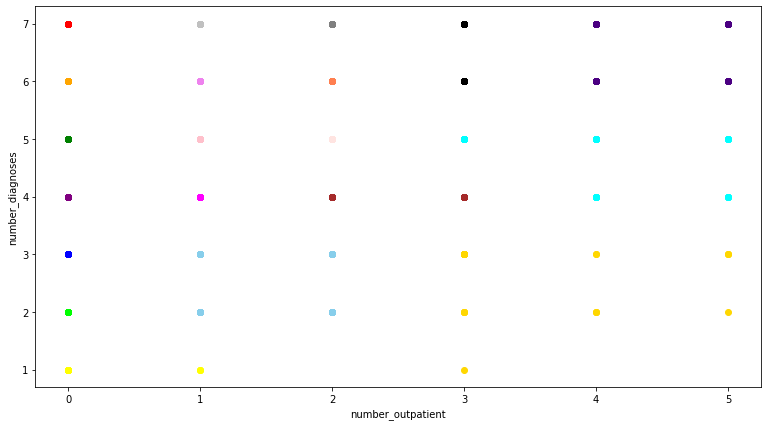

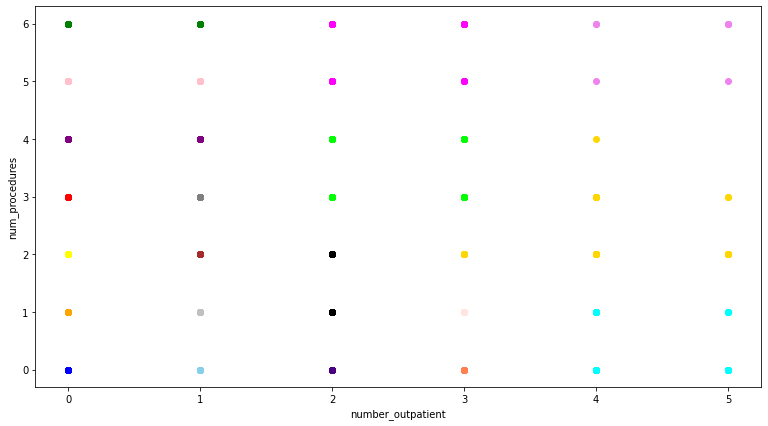

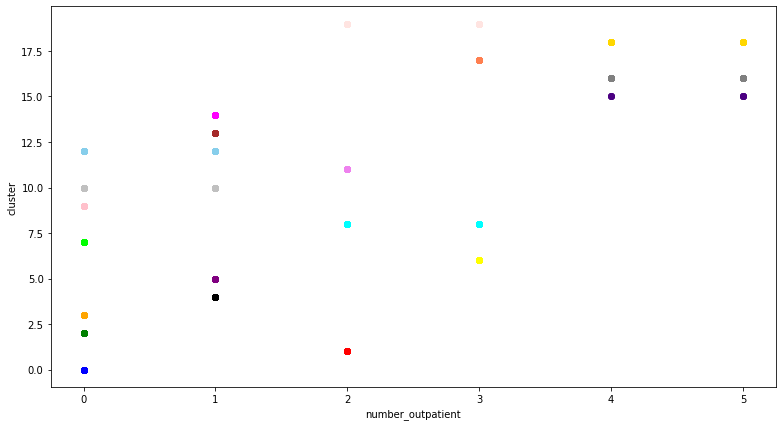

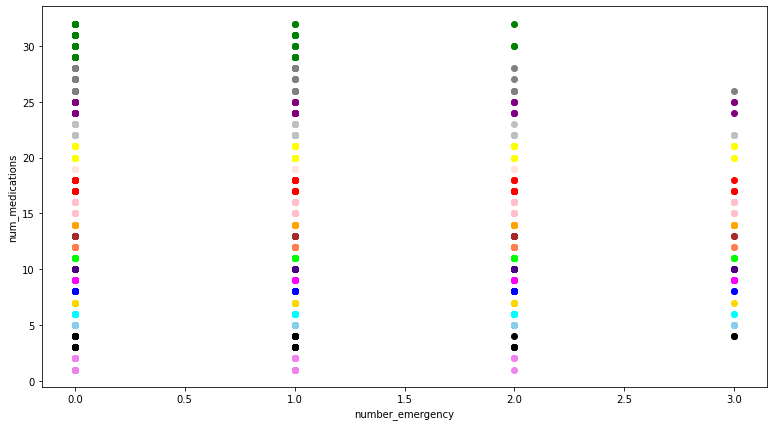

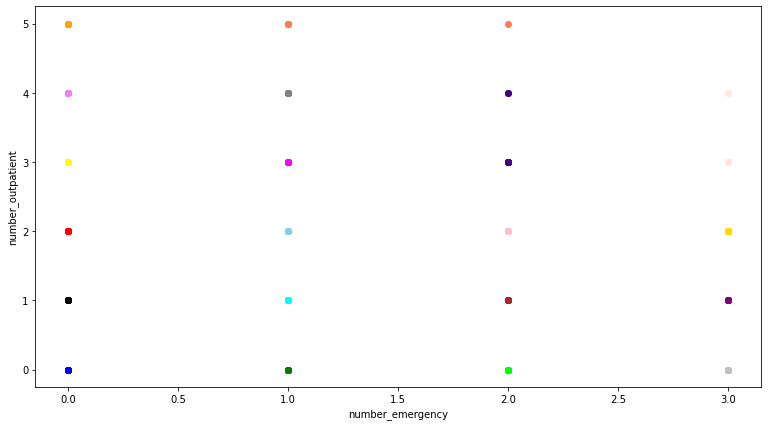

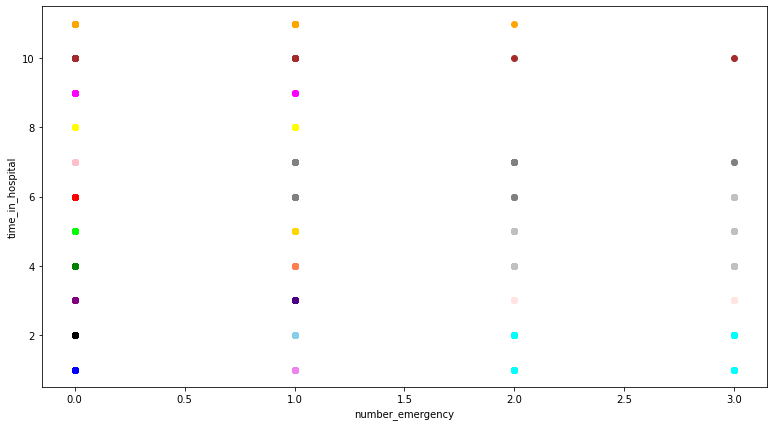

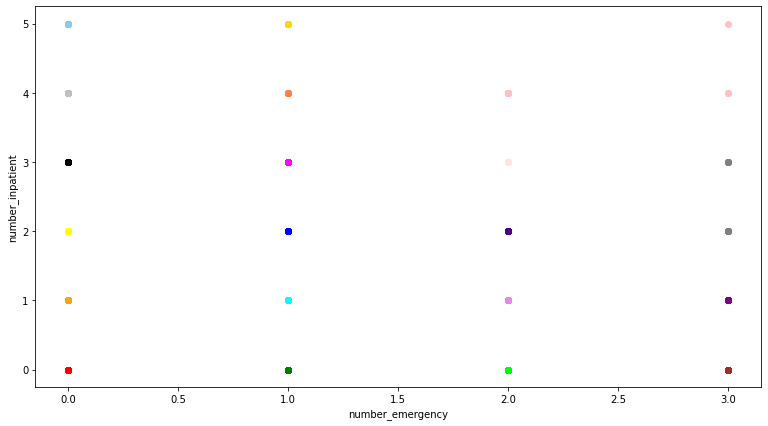

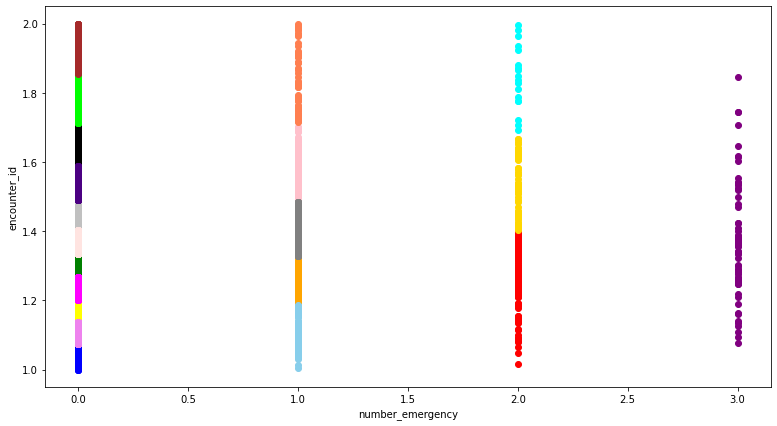

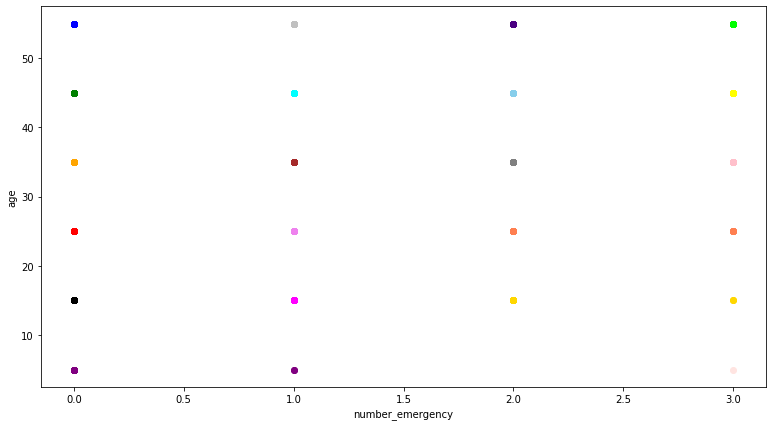

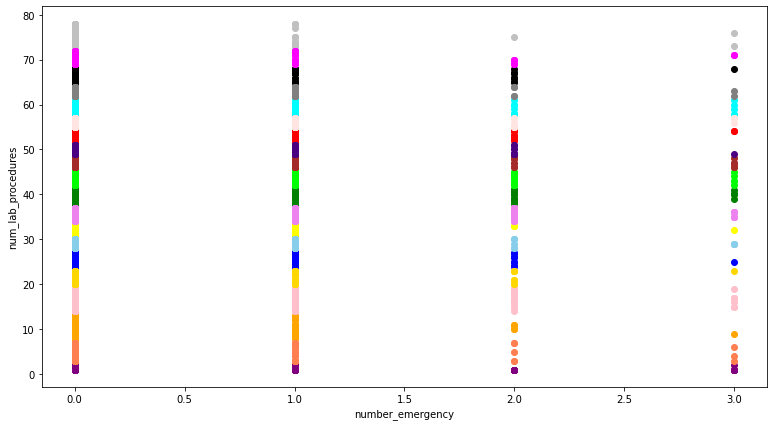

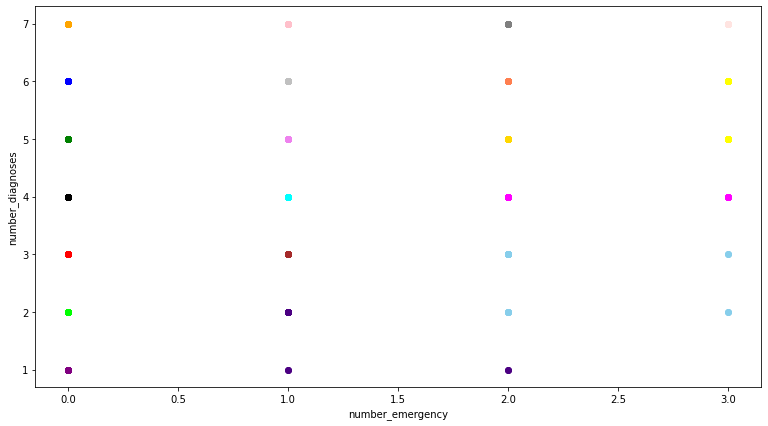

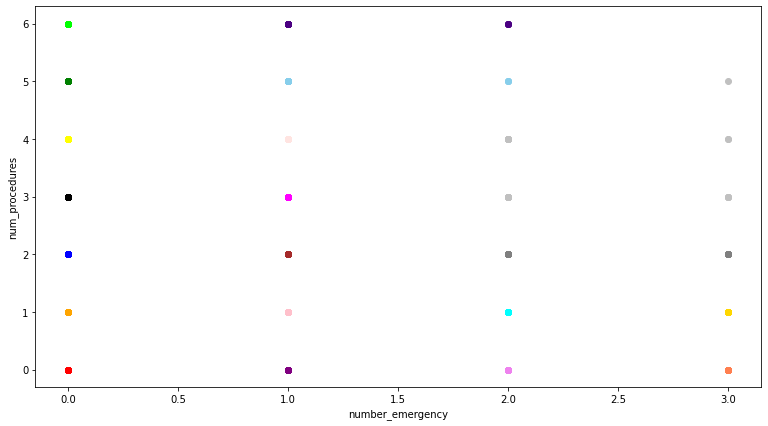

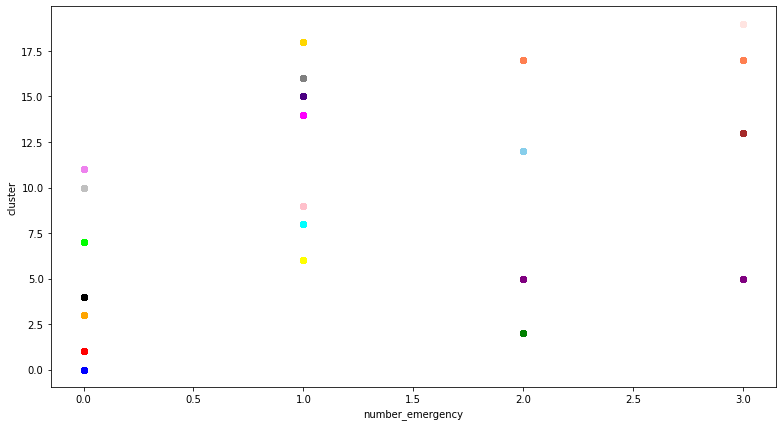

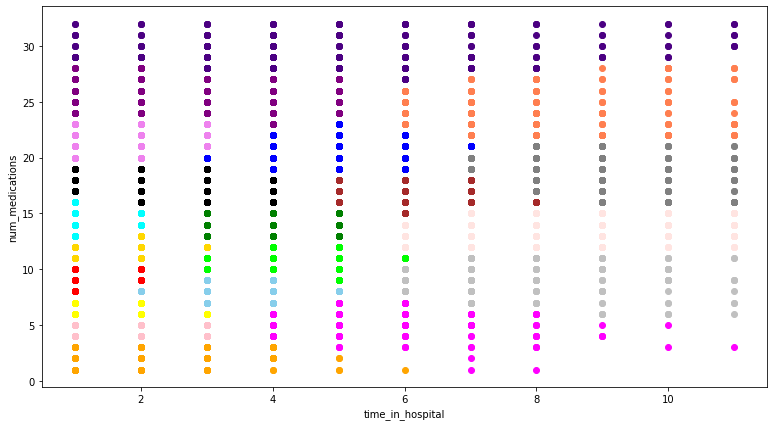

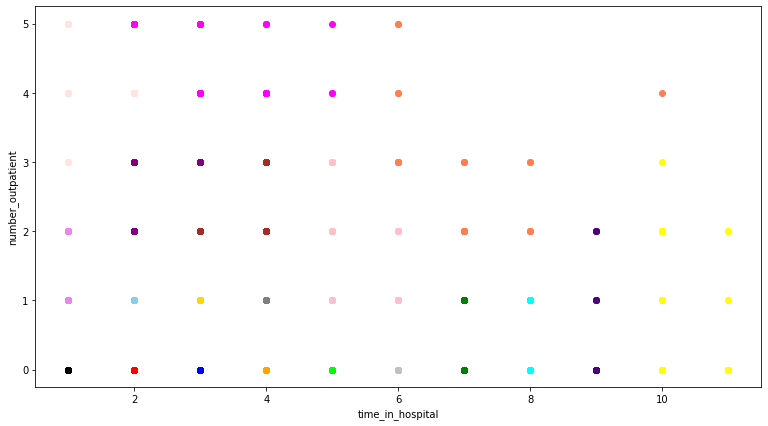

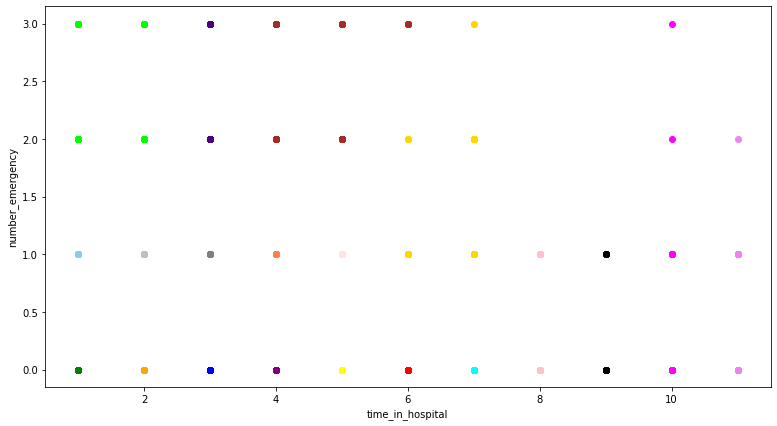

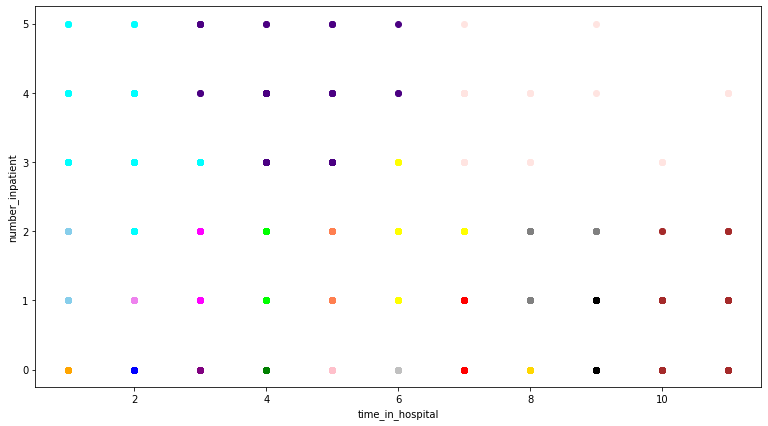

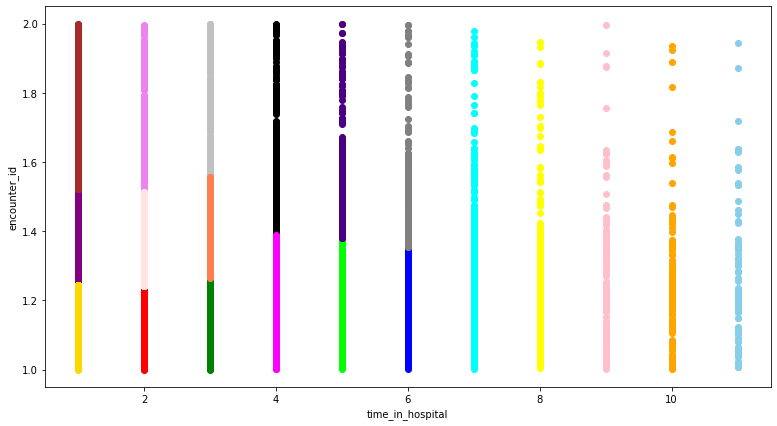

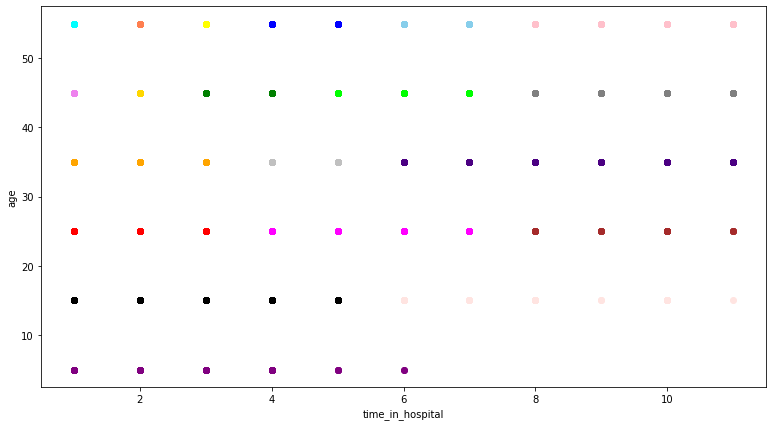

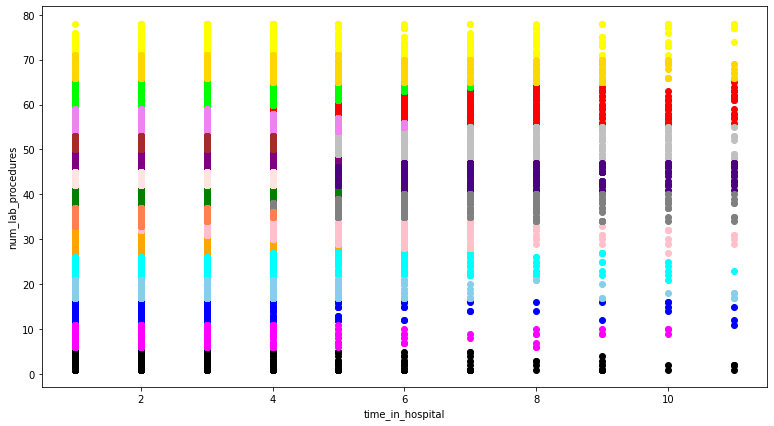

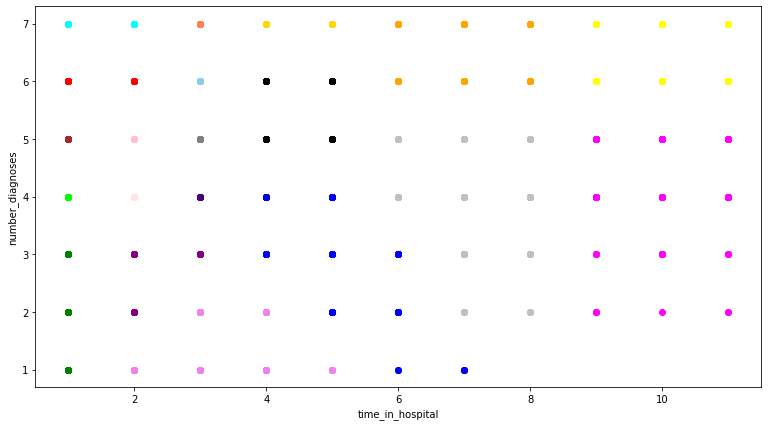

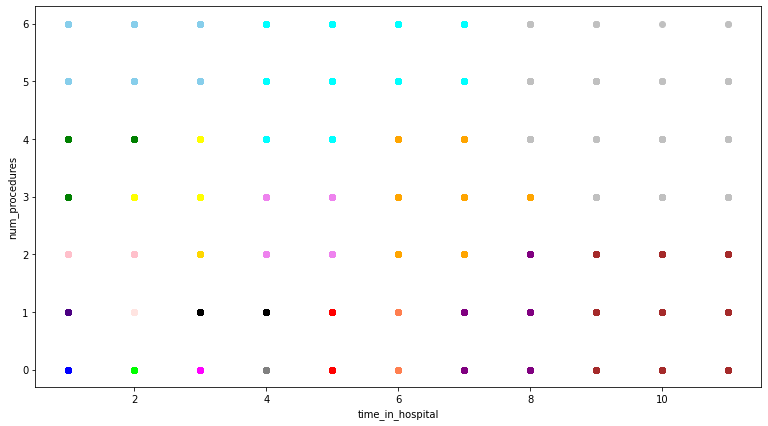

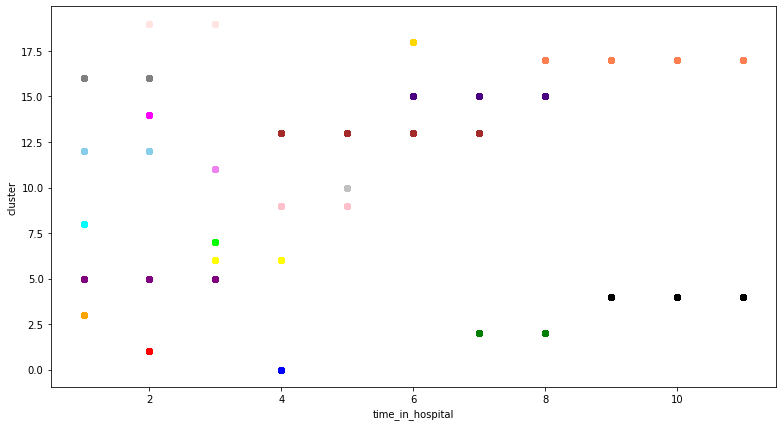

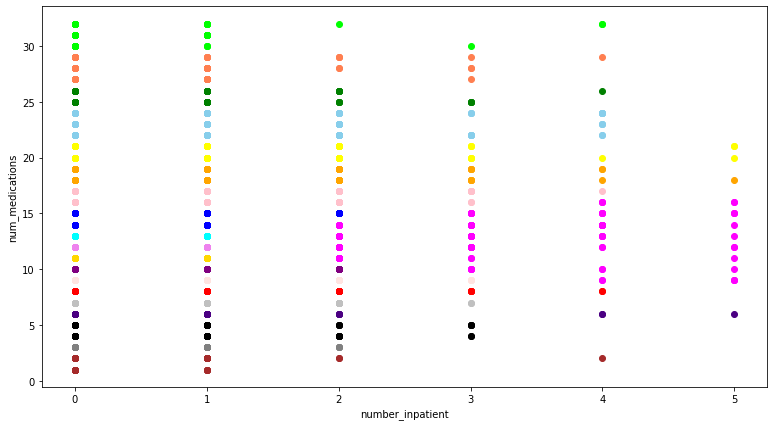

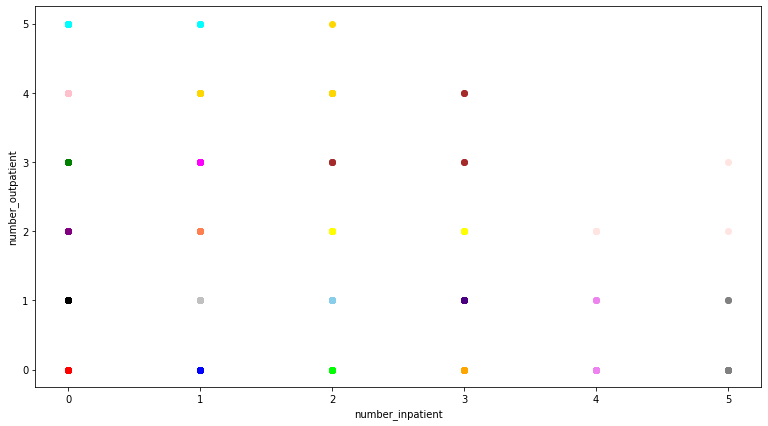

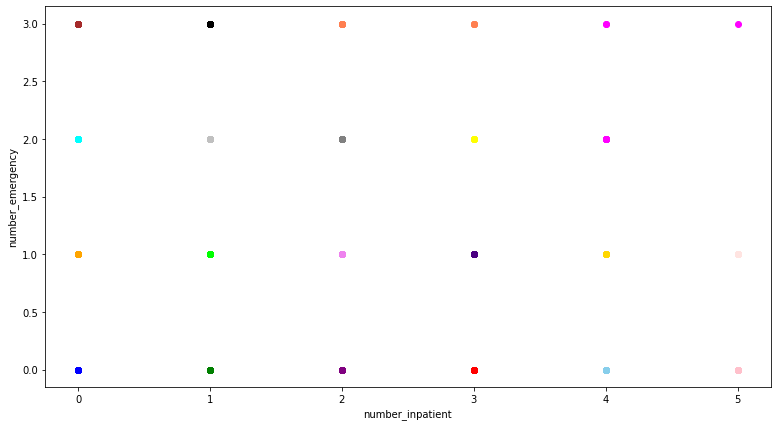

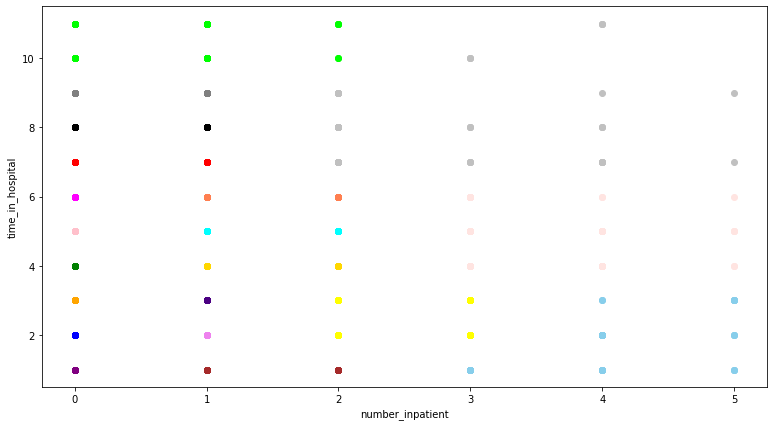

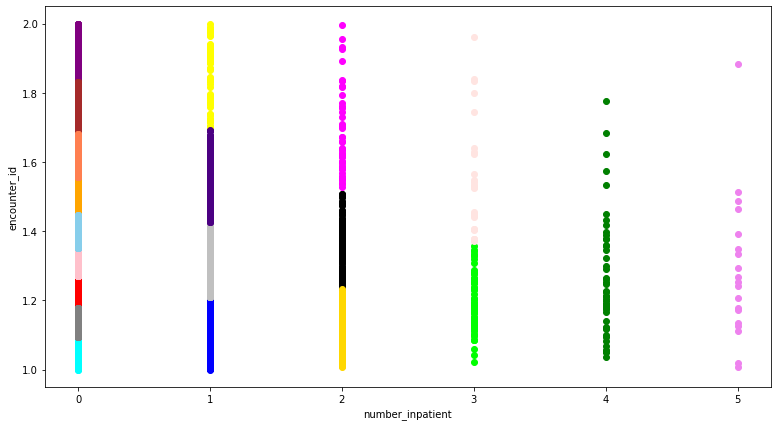

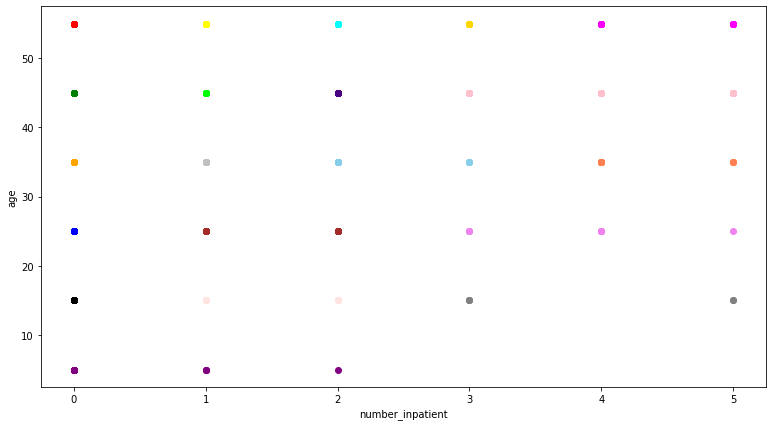

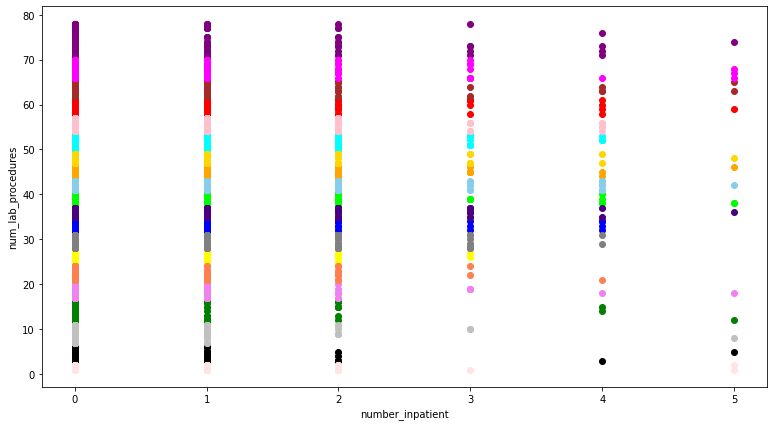

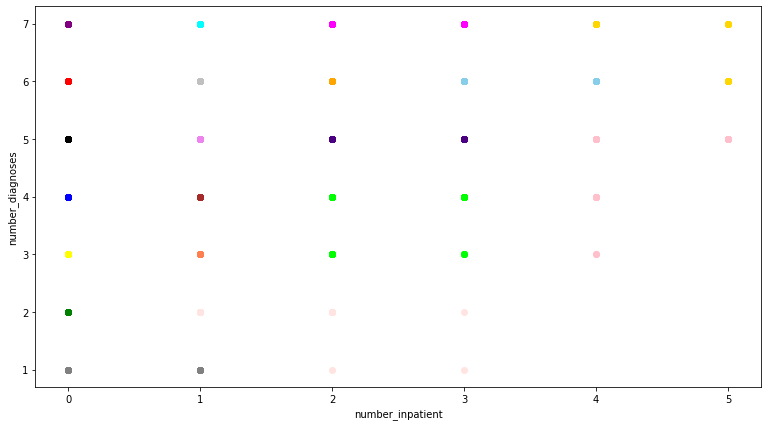

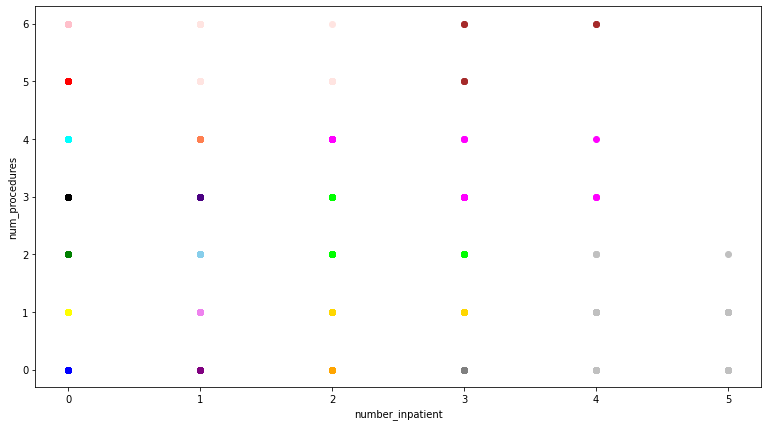

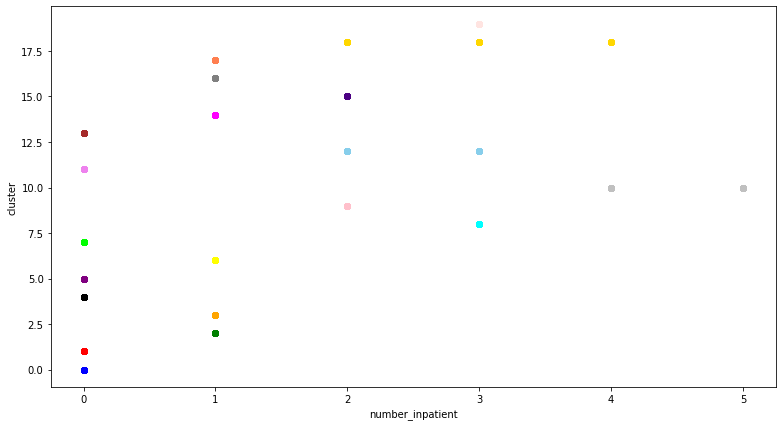

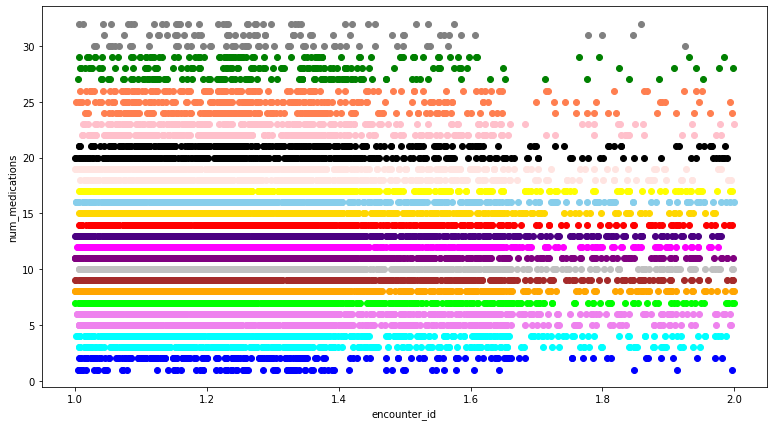

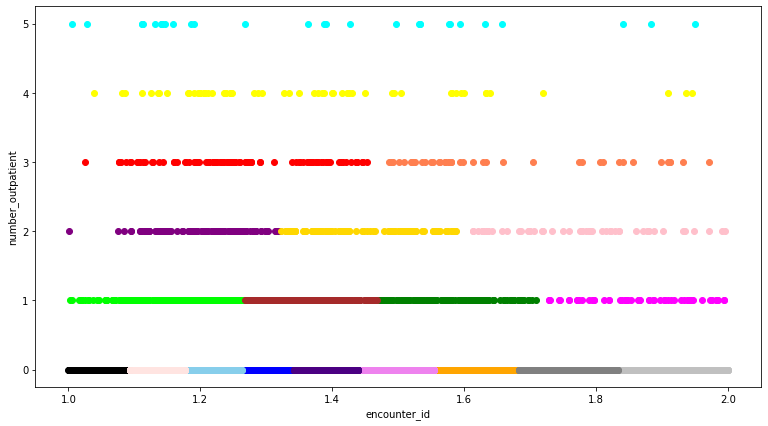

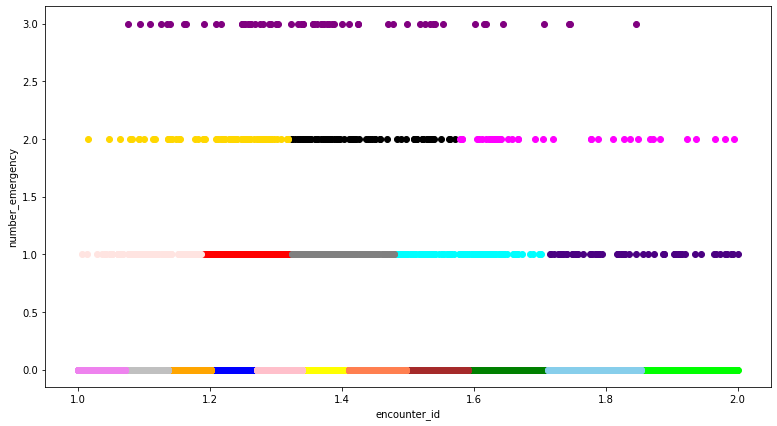

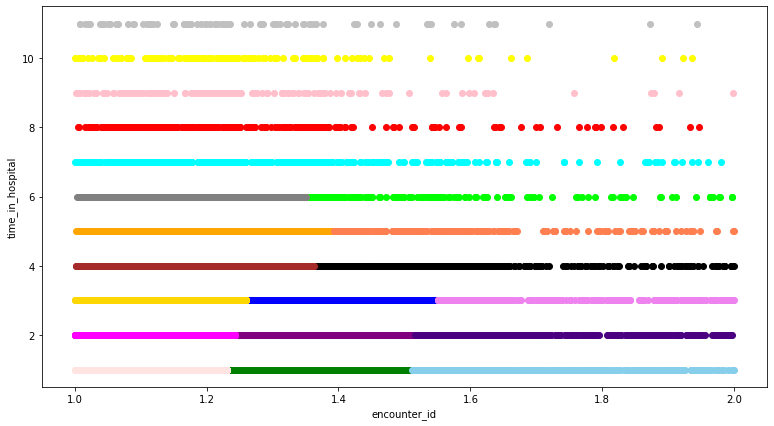

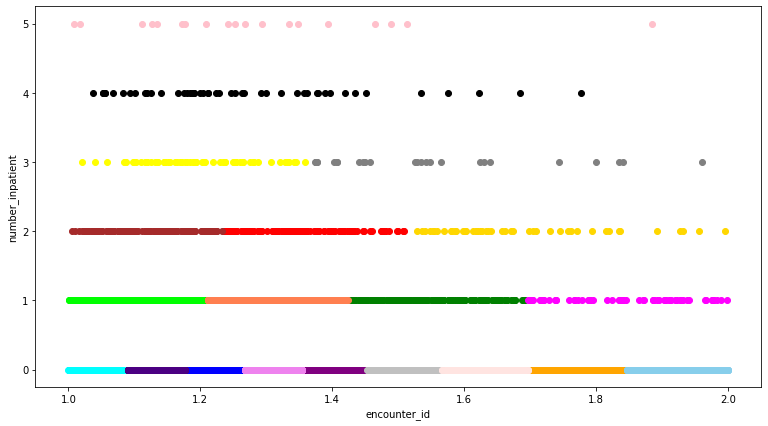

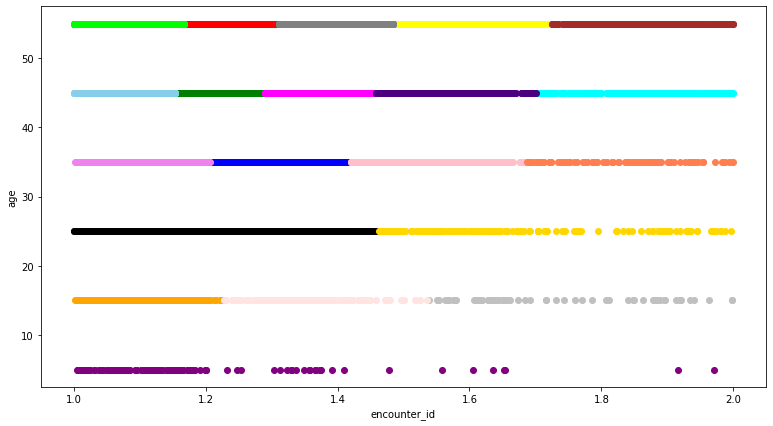

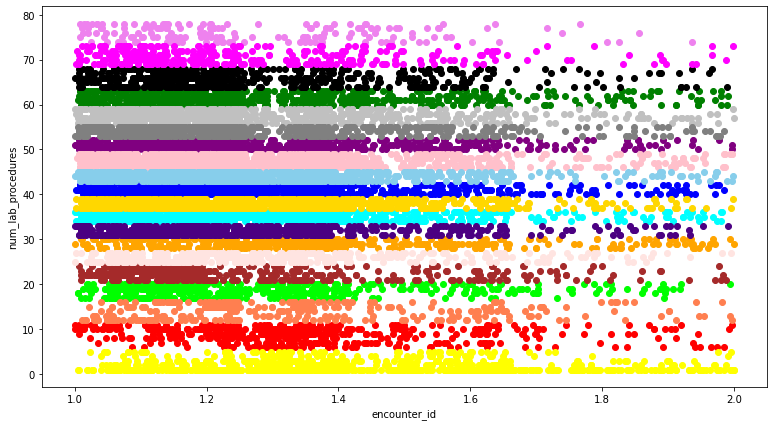

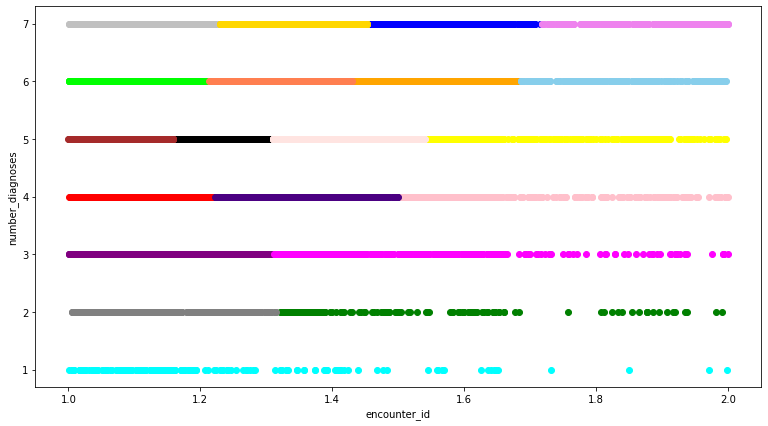

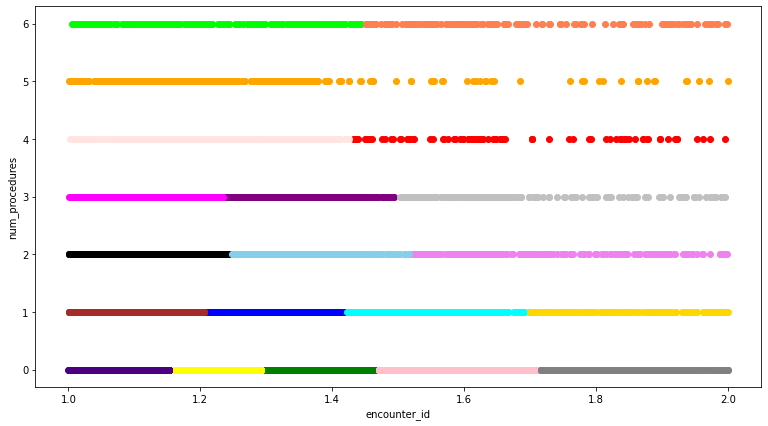

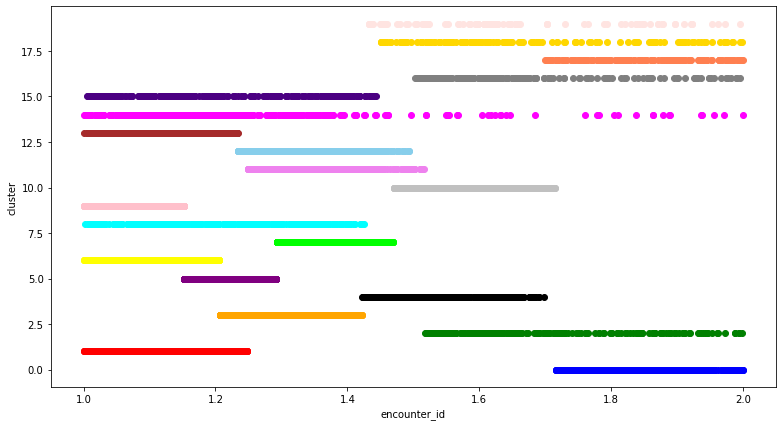

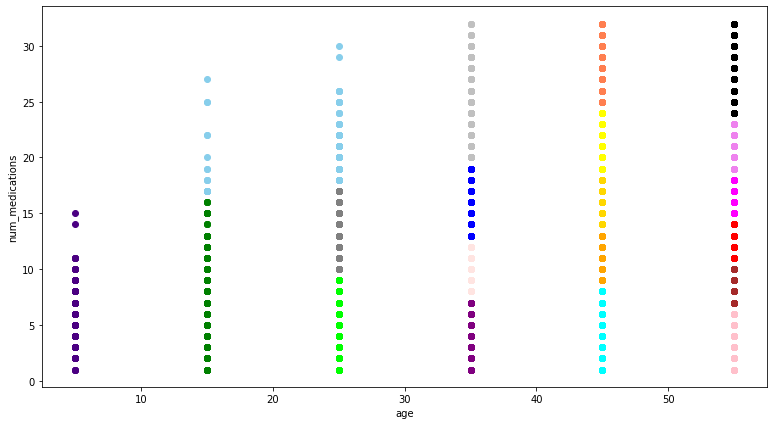

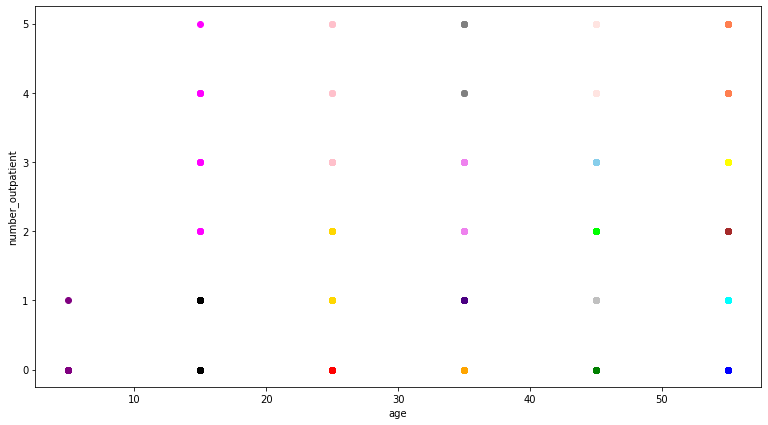

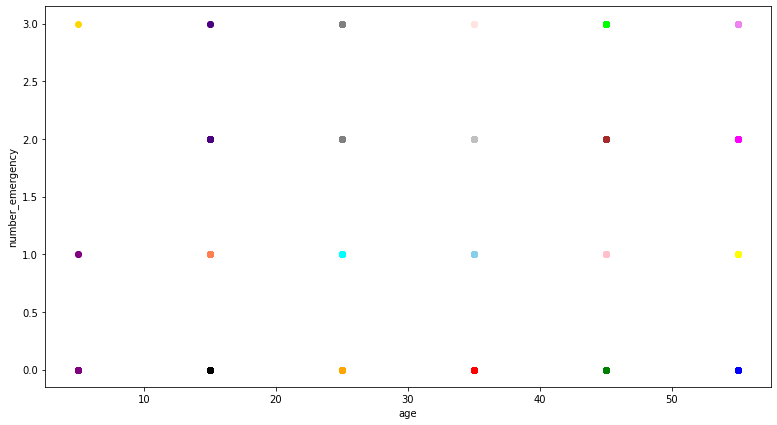

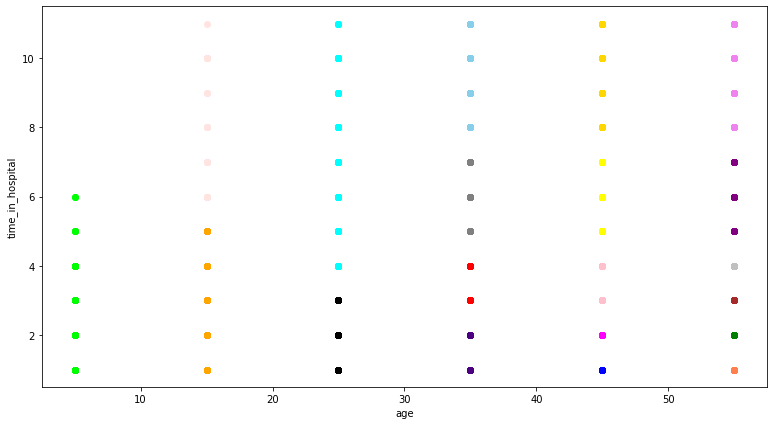

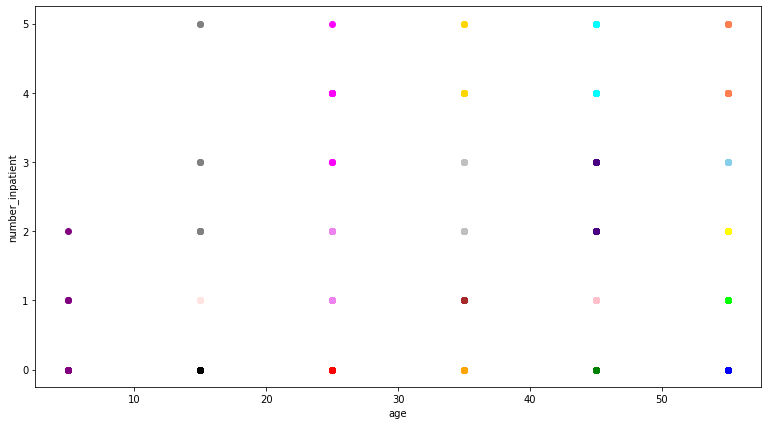

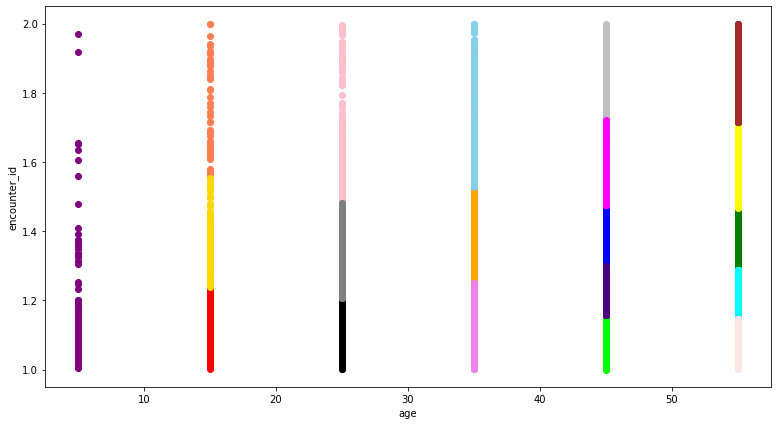

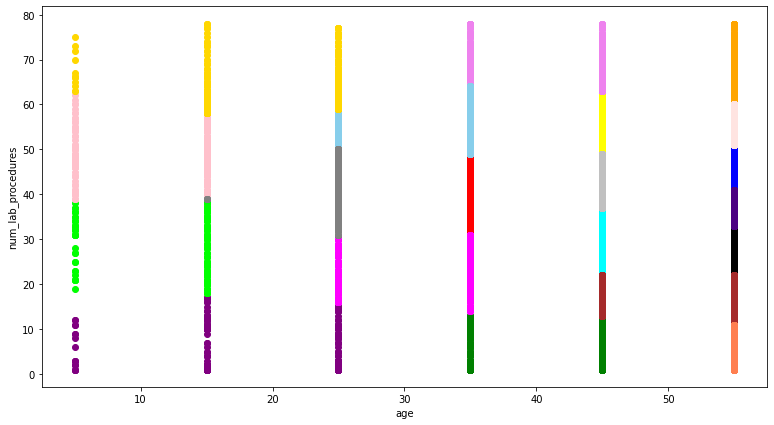

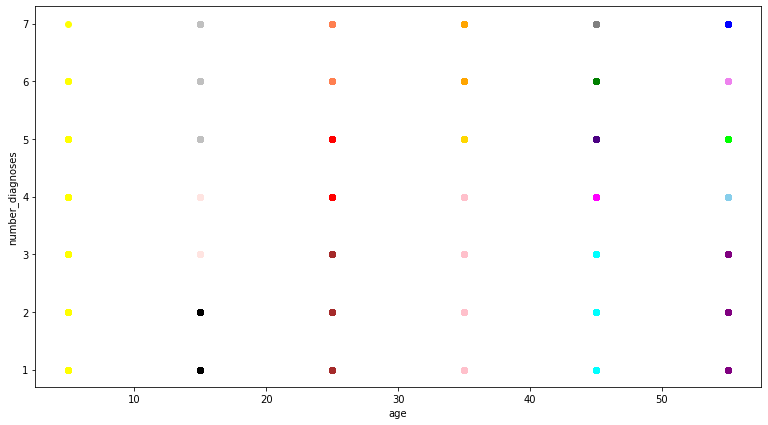

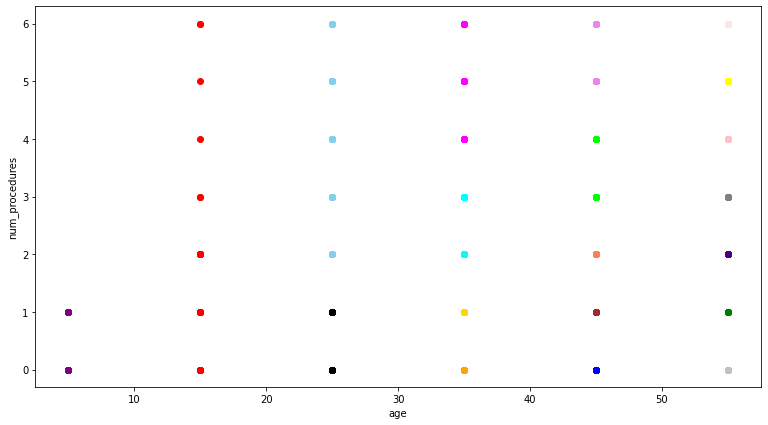

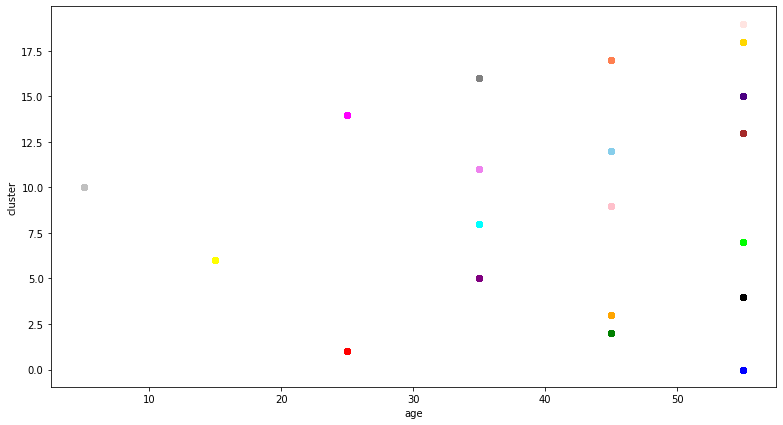

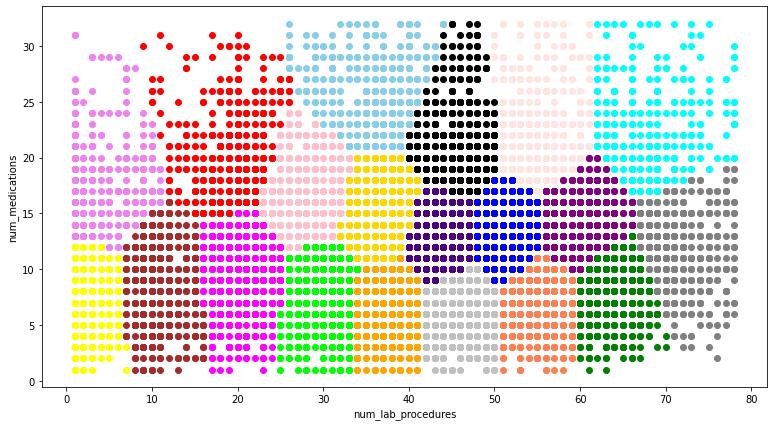

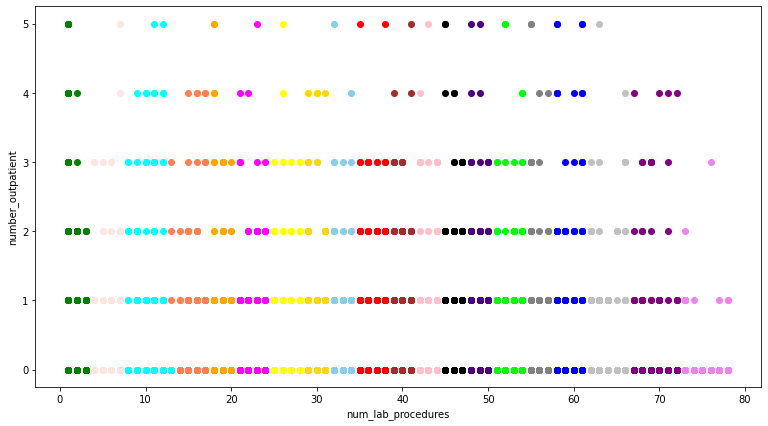

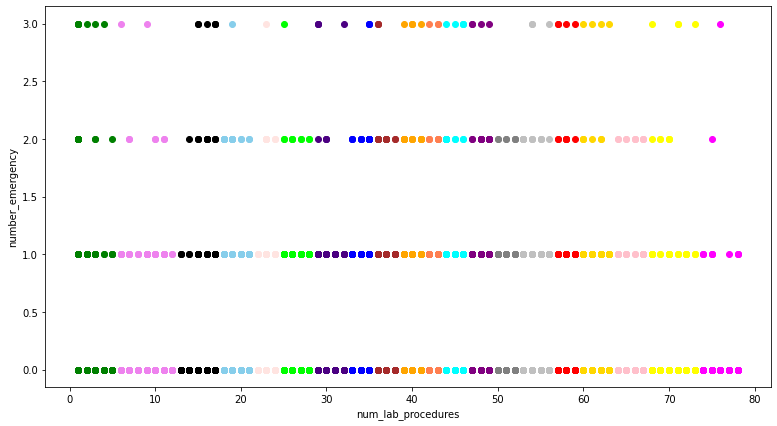

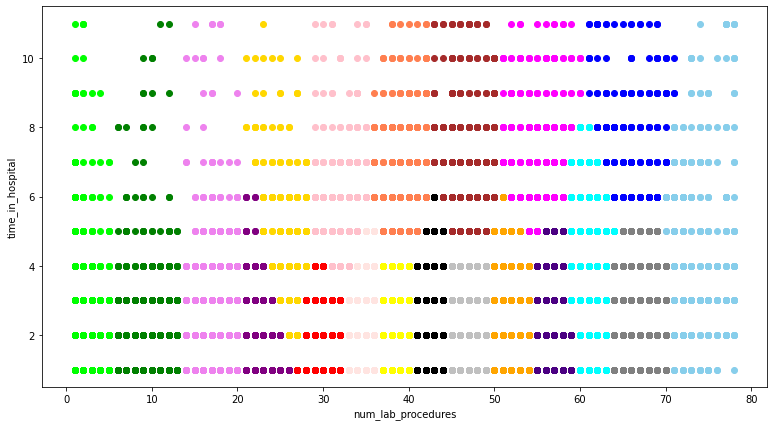

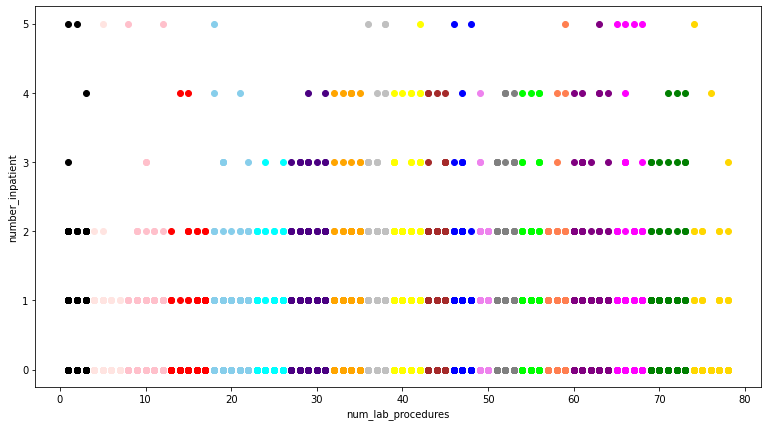

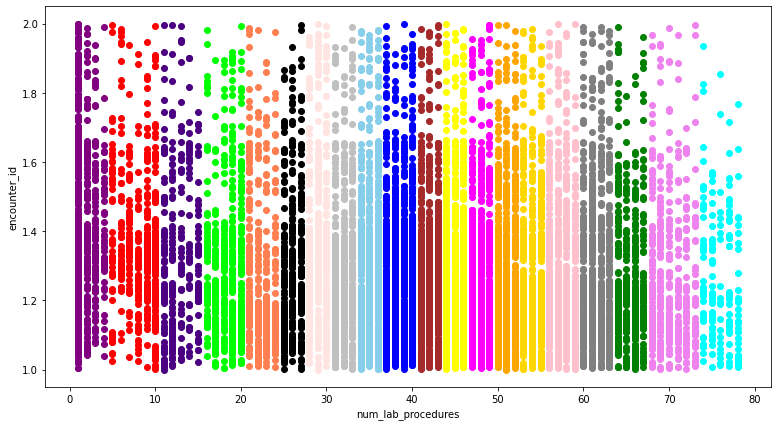

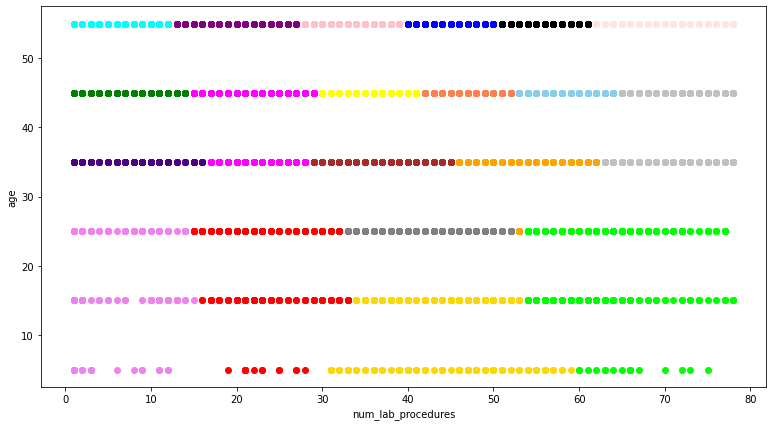

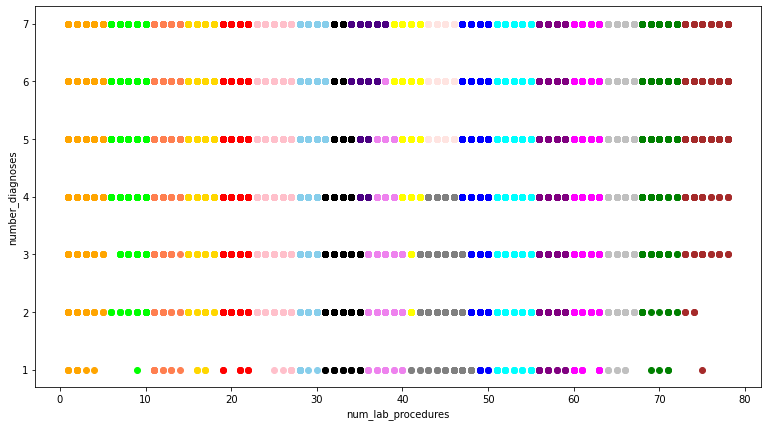

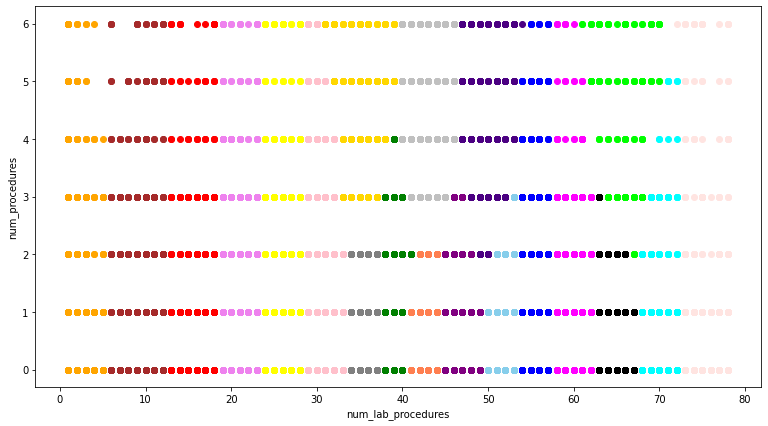

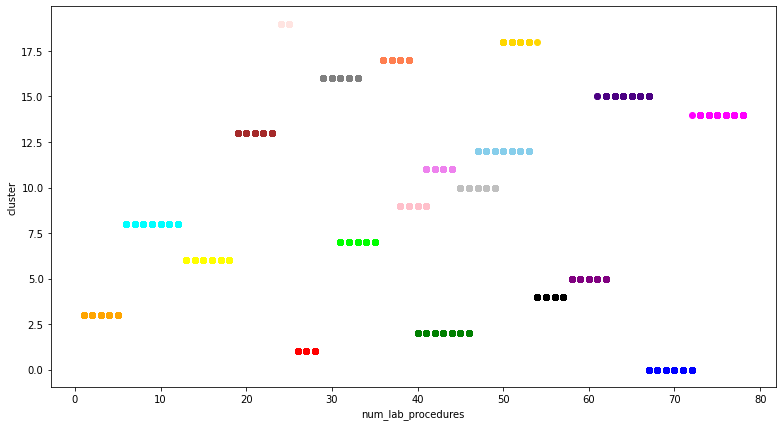

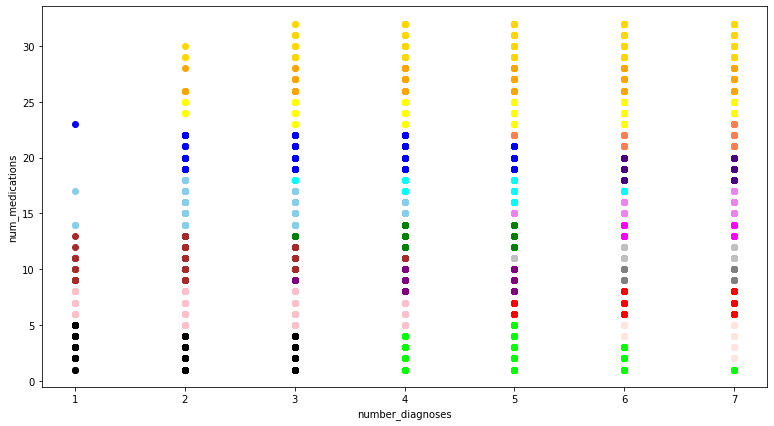

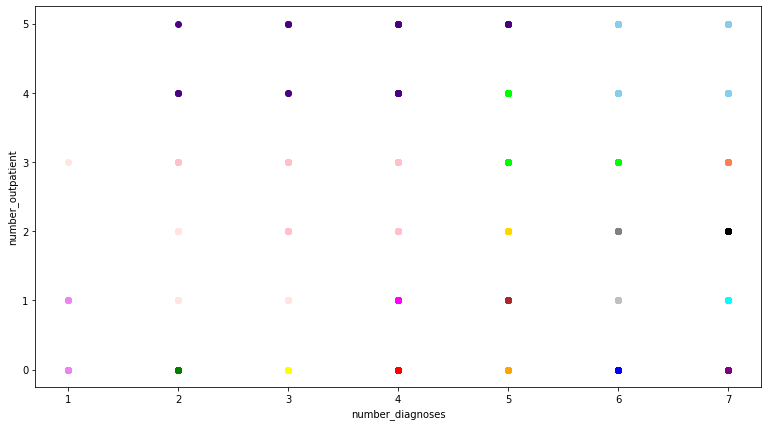

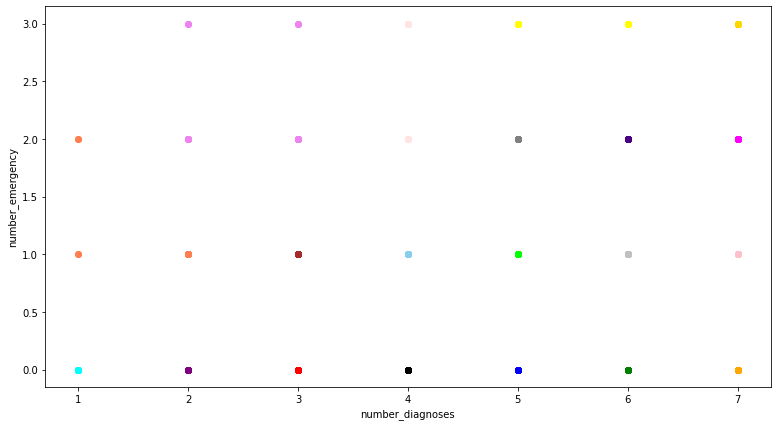

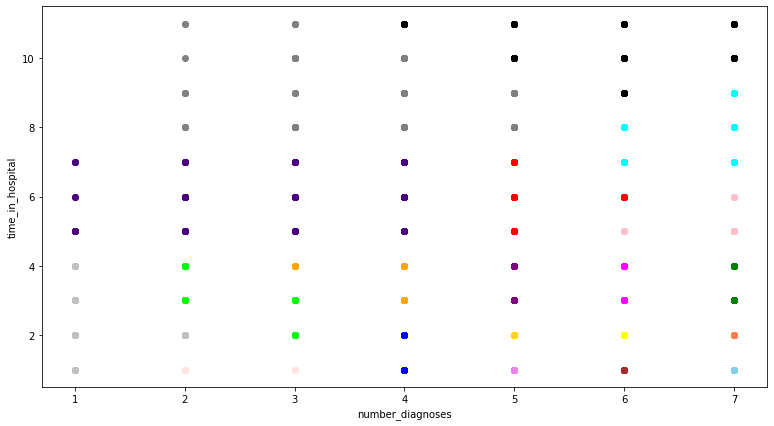

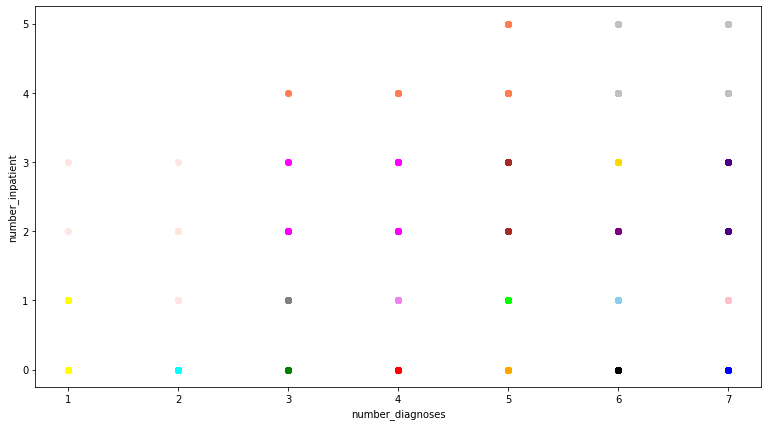

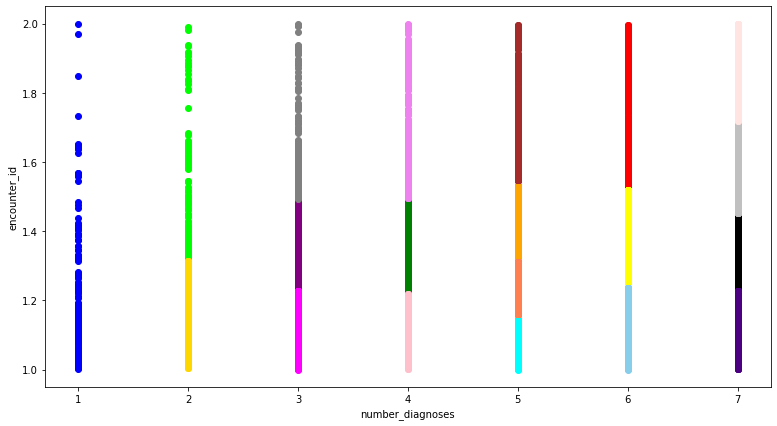

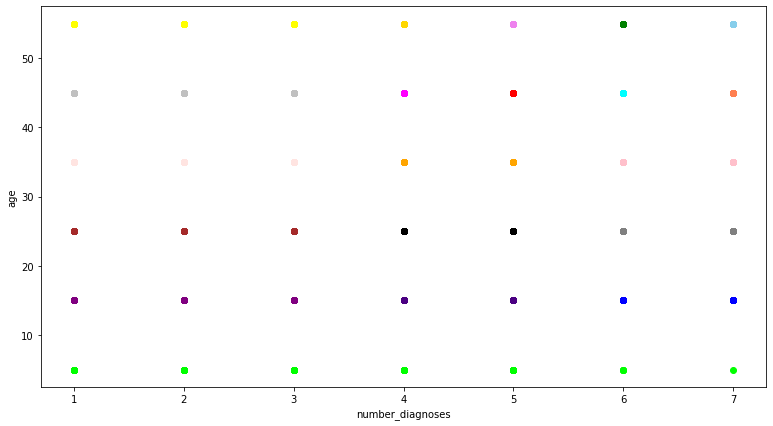

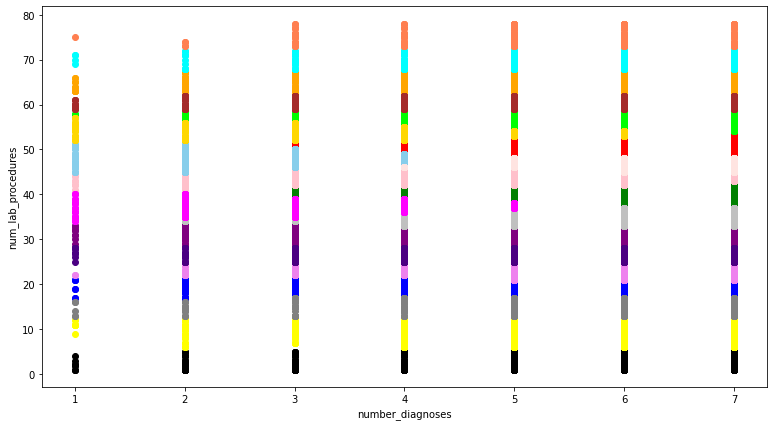

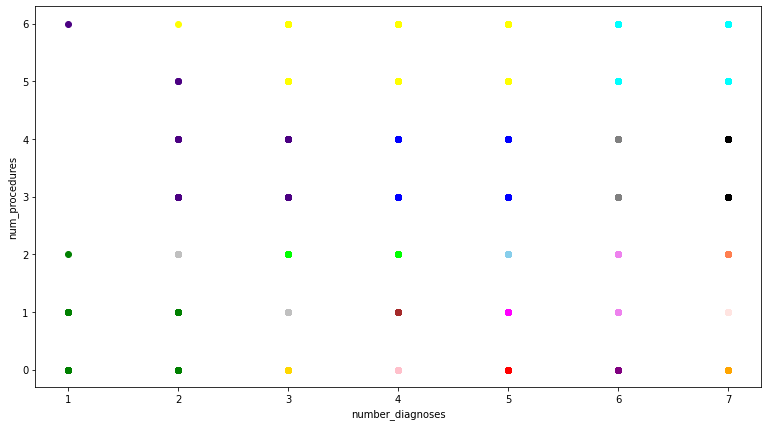

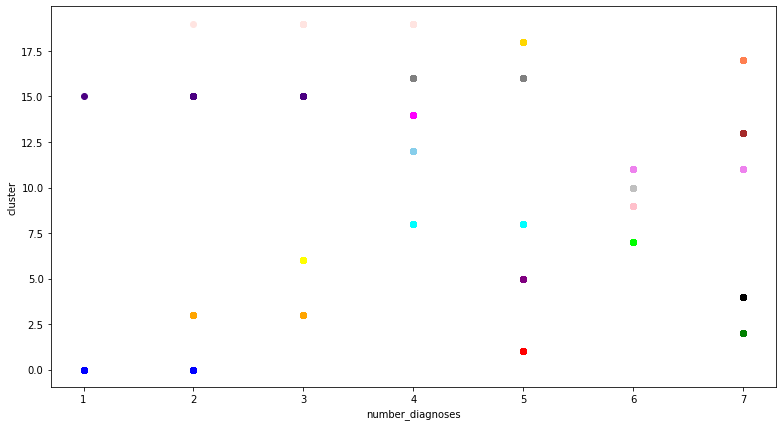

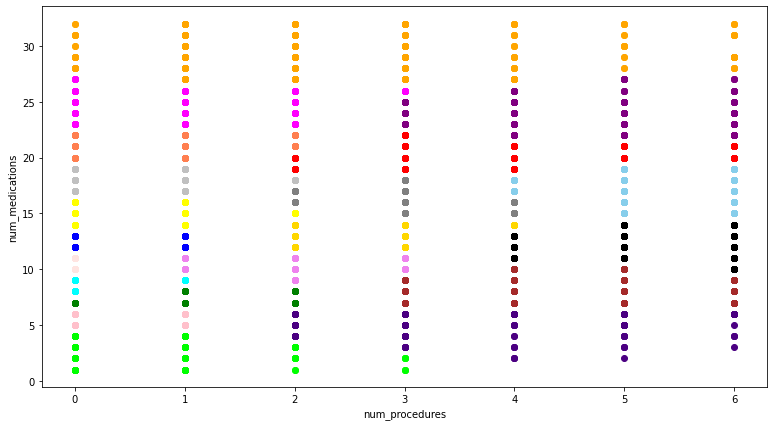

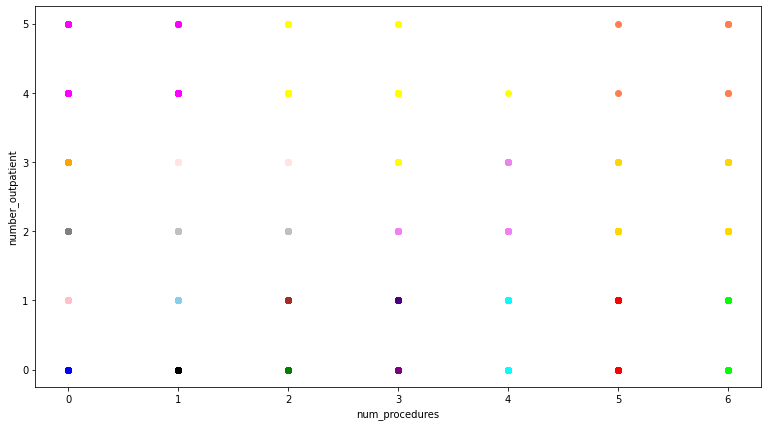

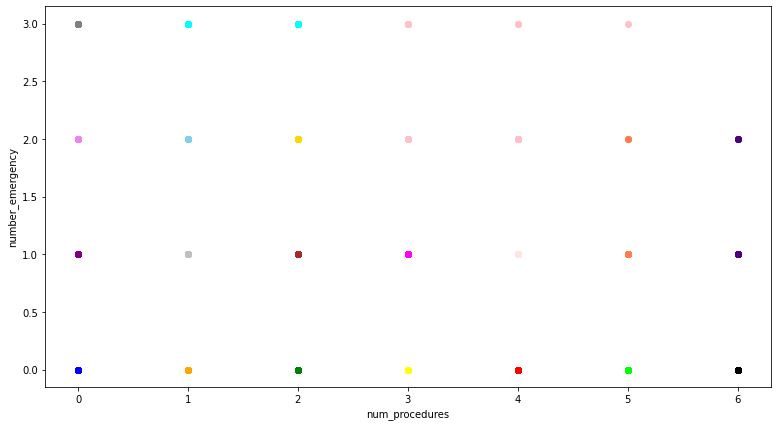

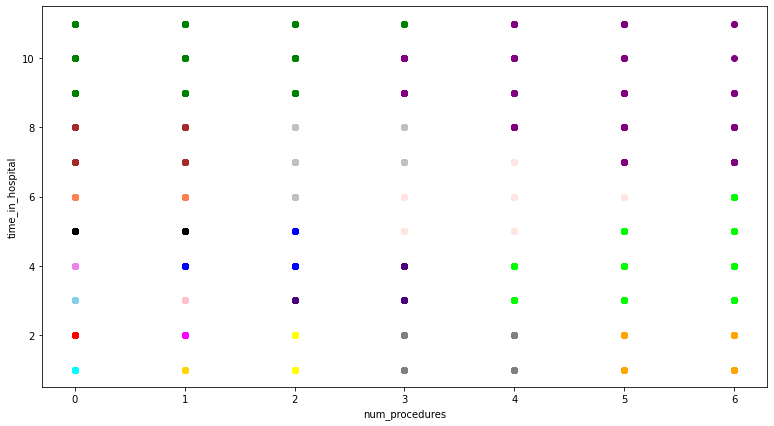

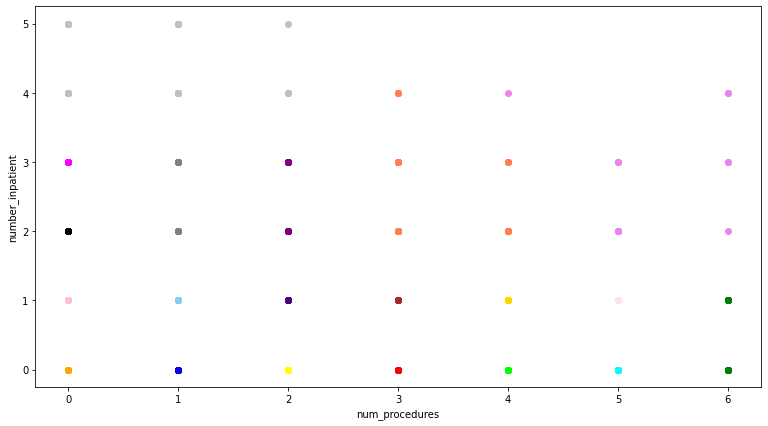

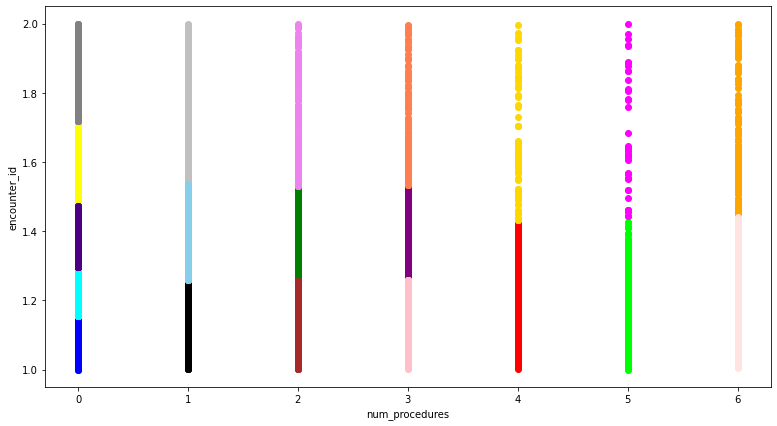

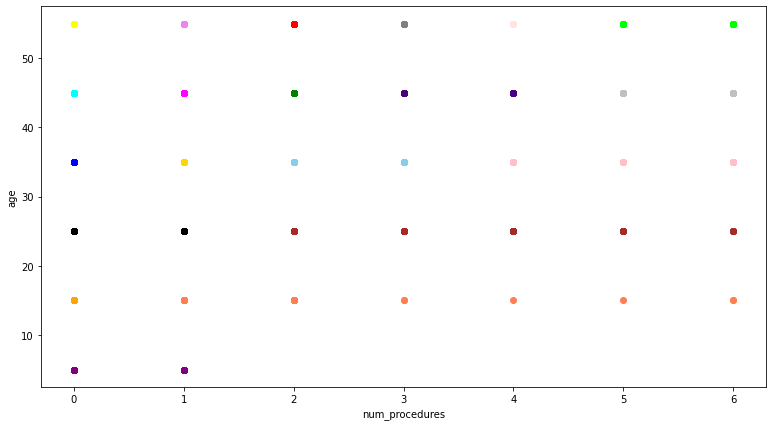

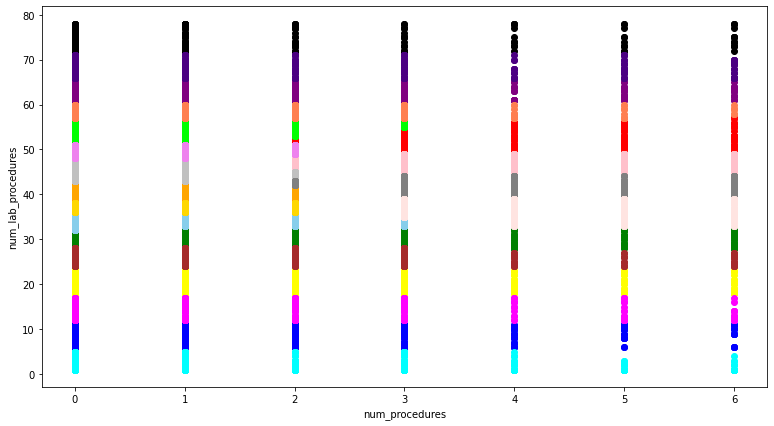

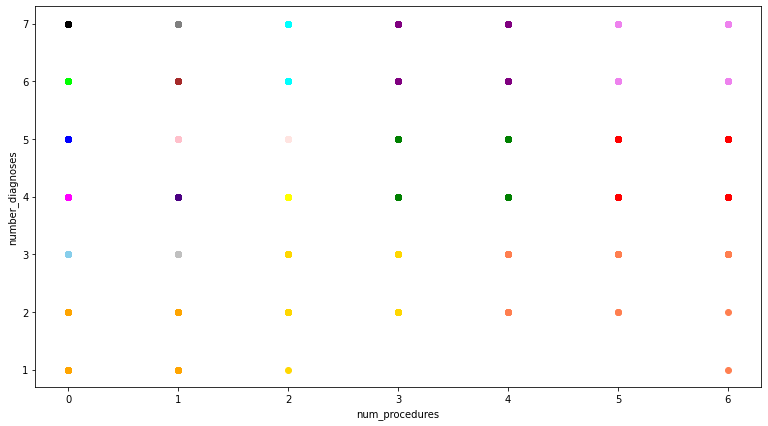

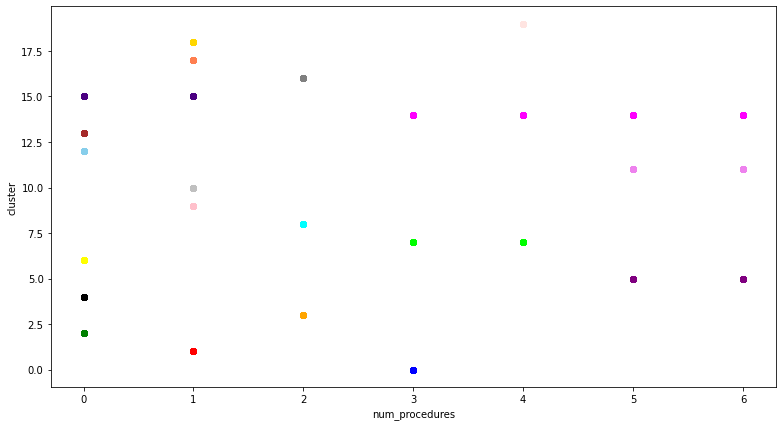

In [102]:
from IPython.core.pylabtools import figsize
from sklearn.cluster import KMeans 

for i in DATA_Cluster.columns:
  for j in DATA_Cluster.columns:
    if i==j:
      pass

    elif i=='cluster':
      pass
    else:
      temp=[]
      temp.append(i)
      temp.append(j)
      mm = KMeans(n_clusters=20)
      y_predicted = mm.fit_predict(DATA_Cluster[temp])

      DATA_Cluster['cluster'] = y_predicted 

      df1 = DATA_Cluster[DATA_Cluster['cluster']==0]
      df2 = DATA_Cluster[DATA_Cluster['cluster']==1]
      df3 = DATA_Cluster[DATA_Cluster['cluster']==2] 
      df4 = DATA_Cluster[DATA_Cluster['cluster']==3]
      df5 = DATA_Cluster[DATA_Cluster['cluster']==4]
      df6 = DATA_Cluster[DATA_Cluster['cluster']==5]
      df7 = DATA_Cluster[DATA_Cluster['cluster']==6]
      df8 = DATA_Cluster[DATA_Cluster['cluster']==7]
      df9 = DATA_Cluster[DATA_Cluster['cluster']==8]
      df10 = DATA_Cluster[DATA_Cluster['cluster']==9]
      df11= DATA_Cluster[DATA_Cluster['cluster']==10]
      df12 = DATA_Cluster[DATA_Cluster['cluster']==11]
      df13= DATA_Cluster[DATA_Cluster['cluster']==12]
      df14= DATA_Cluster[DATA_Cluster['cluster']==13]
      df15= DATA_Cluster[DATA_Cluster['cluster']==14]
      df16= DATA_Cluster[DATA_Cluster['cluster']==15]
      df17= DATA_Cluster[DATA_Cluster['cluster']==16]
      df18= DATA_Cluster[DATA_Cluster['cluster']==17]
      df19 = DATA_Cluster[DATA_Cluster['cluster']==18]
      df20= DATA_Cluster[DATA_Cluster['cluster']==19] 


      figc, axs = plt.subplots(figsize=(13,7))
      axs.set_xlabel(temp[0])
      axs.set_ylabel(temp[1])
      axs.scatter(df1[temp[0]],df1[temp[1]],color='blue')
      axs.scatter(df2[temp[0]],df2[temp[1]],color='red')
      axs.scatter(df3[temp[0]],df3[temp[1]],color='green')
      axs.scatter(df4[temp[0]],df4[temp[1]],color='orange')
      axs.scatter(df5[temp[0]],df5[temp[1]],color='black')
      axs.scatter(df6[temp[0]],df6[temp[1]],color='purple')
      axs.scatter(df7[temp[0]],df7[temp[1]],color='yellow')
      axs.scatter(df8[temp[0]],df8[temp[1]],color='lime')
      axs.scatter(df9[temp[0]],df9[temp[1]],color='cyan')
      axs.scatter(df10[temp[0]],df10[temp[1]],color='pink')
      axs.scatter(df11[temp[0]],df11[temp[1]],color='silver')
      axs.scatter(df12[temp[0]],df12[temp[1]],color='violet')
      axs.scatter(df13[temp[0]],df13[temp[1]],color='skyblue')
      axs.scatter(df14[temp[0]],df14[temp[1]],color='brown')
      axs.scatter(df15[temp[0]],df15[temp[1]],color='magenta')
      axs.scatter(df16[temp[0]],df16[temp[1]],color='indigo')
      axs.scatter(df17[temp[0]],df17[temp[1]],color='grey')
      axs.scatter(df18[temp[0]],df18[temp[1]],color='coral')
      axs.scatter(df19[temp[0]],df19[temp[1]],color='gold')
      axs.scatter(df20[temp[0]],df20[temp[1]],color='mistyrose')

      plt.show()

#**Thank you sir :)**